In [3]:
import numpy as np
import pandas as pd
from sklearn import neighbors
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, RocCurveDisplay, roc_curve
import random as rd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

# Logistic regression 

In [4]:
# Seed
seed = 12345
df = pd.read_csv('../data/complete_dataset.csv', index_col=0)
target = df['target']
features = df.iloc[:,:-1]

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(features.values)

X_train, X_test, y_train, y_test = train_test_split(X_train, target.values, random_state=seed, train_size=0.8, test_size=0.2)

cv = KFold(n_splits = len(X_train), random_state=seed, shuffle=True)

In [5]:
param_grid_logistic = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
    'penalty': ['l1', 'l2'], 
}

In [6]:
#Create a model for logistic regression
model = LogisticRegression(max_iter=1000, solver='liblinear')
grid_search_logistic = GridSearchCV(model, param_grid_logistic, cv=cv, verbose=0)
grid_result = grid_search_logistic.fit(X_train, y_train)
best_classifier = grid_result.best_estimator_
print(f"Best Accuracy = {grid_result.best_score_}")
print("Classifier paramns")
print(grid_result.best_params_)

Best Accuracy = 0.8863636363636364
Classifier paramns
{'C': 10, 'penalty': 'l1'}


In [11]:
def evaluate_kfold(list_of_estimators, X_total, y_total):
    # Verificando a media com todos os elementos e classificadores
    list_sensibility = []
    list_specificity = []
    list_of_false_positives_rate = []

    for i, estimator in enumerate(list_of_estimators):
        X_pred = X_total
        y_truth = y_total
        y_pred = estimator.predict(X_pred)
        tn, fp, fn, tp = confusion_matrix(y_truth, y_pred).ravel()
        sensibility = tp / (tp + fn)
        specificity = tn / (tn + fp)
        false_pos_rate = 1 - specificity

        print(f'Number of samples: {len(X_pred)}')
        print(f"Specificity= {specificity}")
        print(f"Sensibility= {sensibility}")
        print(f"False positive rate = {false_pos_rate}\n\n")

        list_sensibility.append(sensibility)
        list_specificity.append(specificity)
        list_of_false_positives_rate.append(false_pos_rate)
  
        ConfusionMatrixDisplay(confusion_matrix=confusion_matrix(y_truth, y_pred), display_labels=['Non Infart', 'Infart']).plot()
        RocCurveDisplay.from_predictions(y_truth, y_pred, pos_label=1)
        plt.grid(True)
        plt.show()

    print(f"Mean Specificity= {np.mean(list_specificity)} Std: {np.std(list_specificity)}")
    print(f"Mean Sensibility= {np.mean(list_sensibility)}  Std: {np.std(list_sensibility)}")
    print(f"Mean False Positive Rate= {np.mean(list_of_false_positives_rate)}  Std: {np.std(list_of_false_positives_rate)}")

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




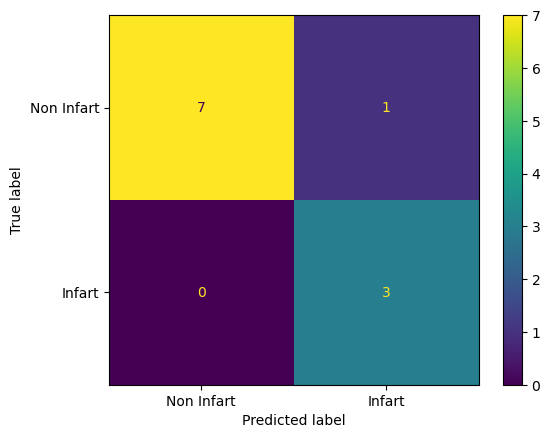

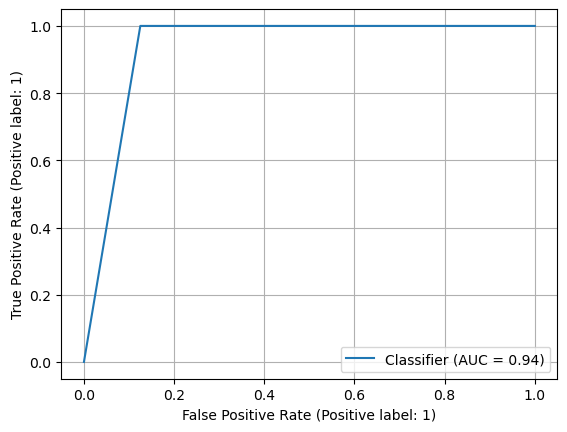

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




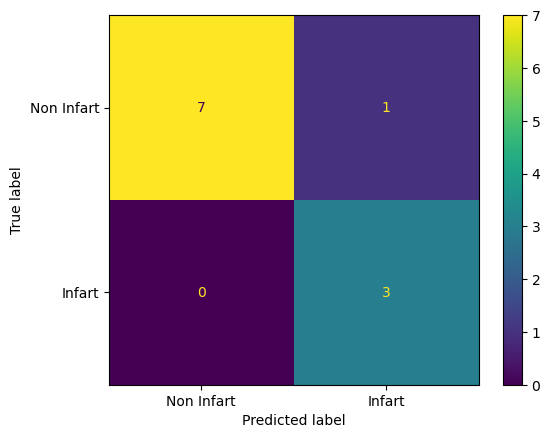

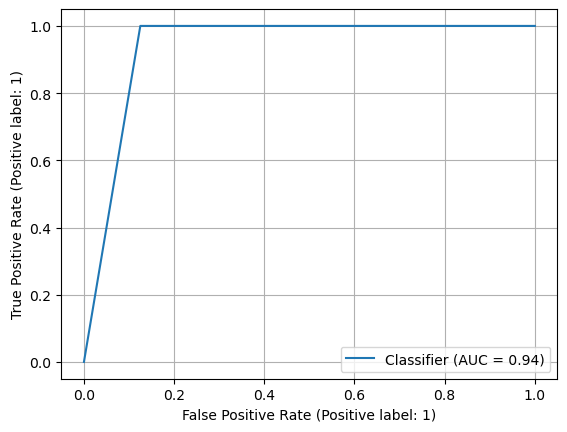

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




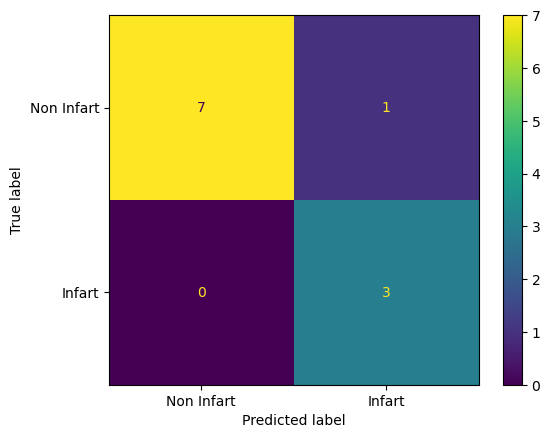

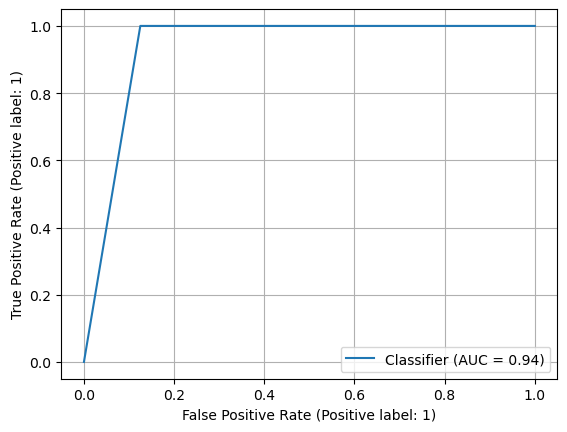

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




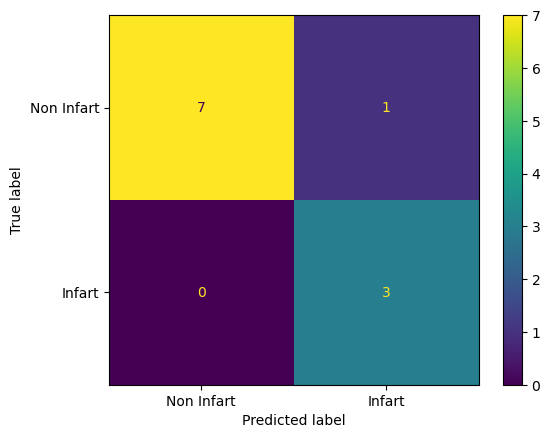

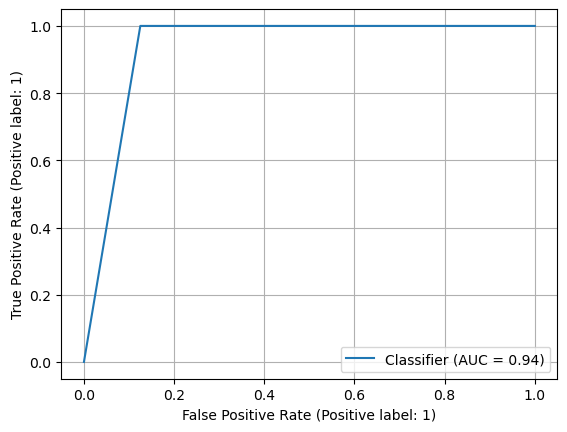

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




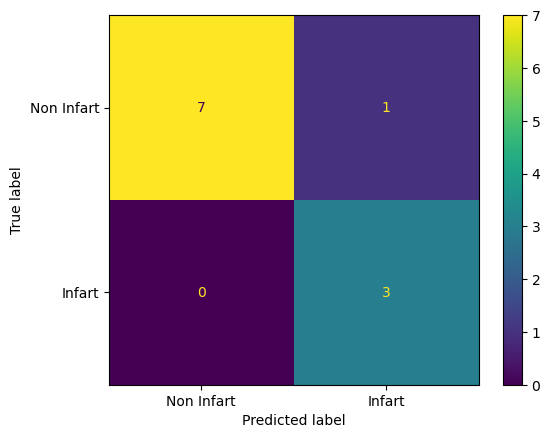

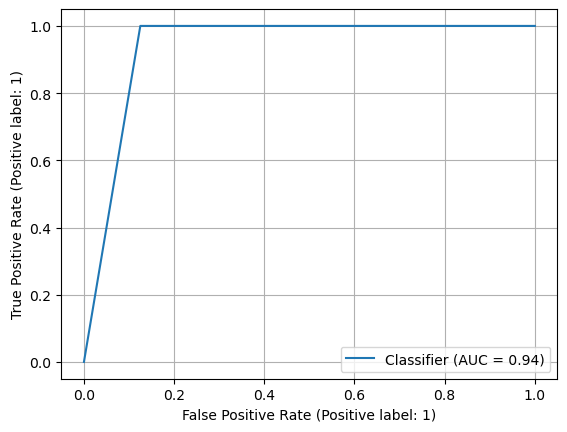

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




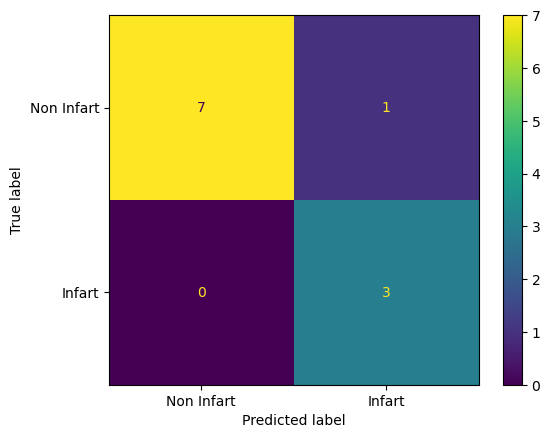

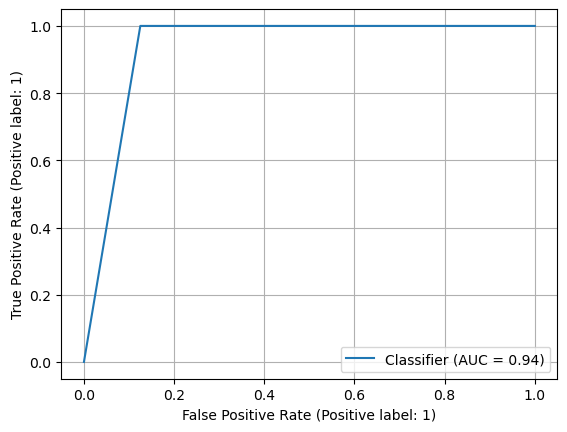

Number of samples: 11
Specificity= 0.75
Sensibility= 1.0
False positive rate = 0.25




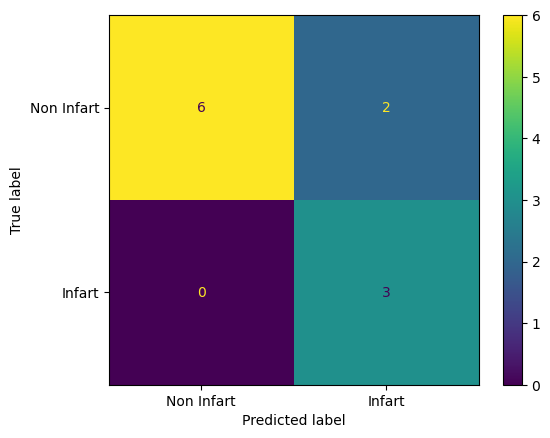

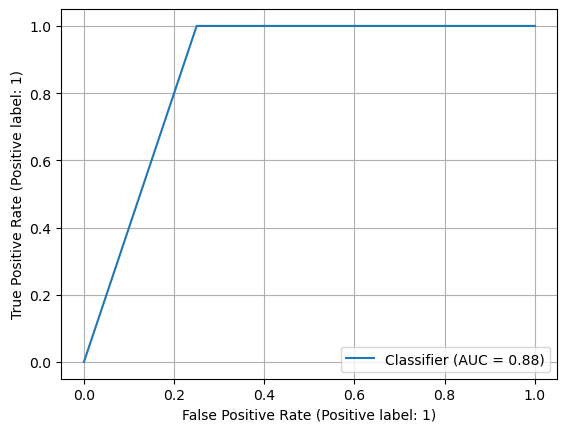

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




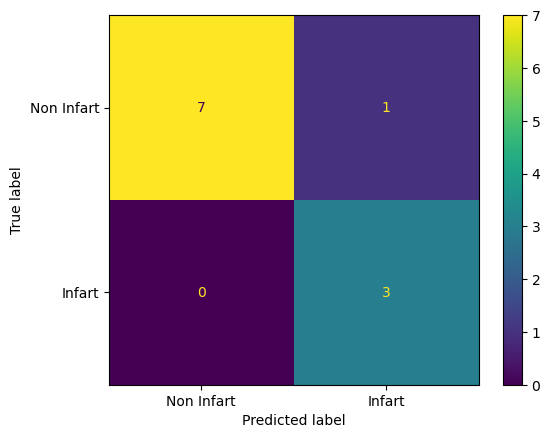

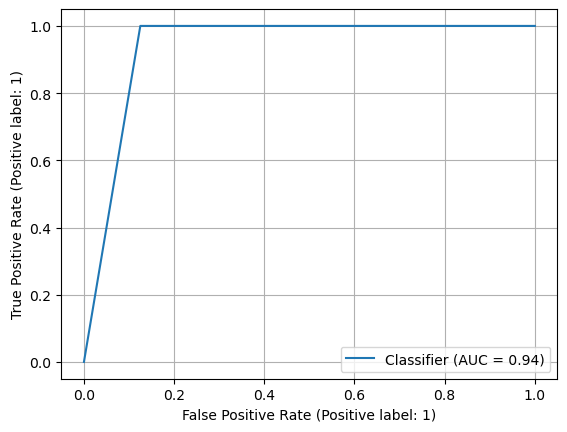

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




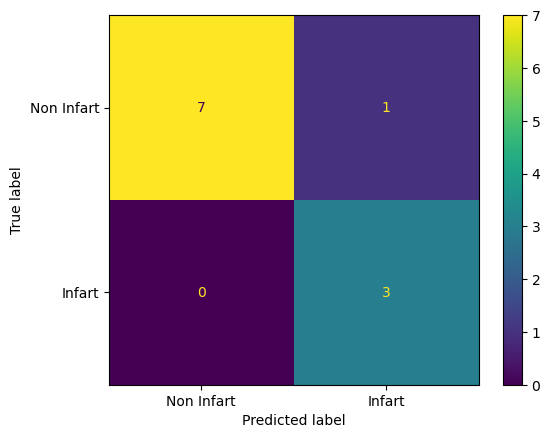

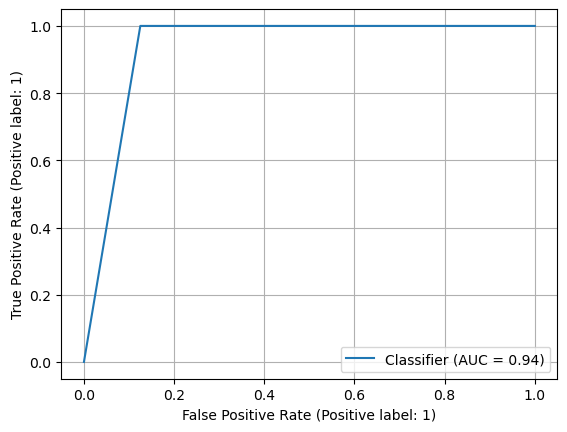

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




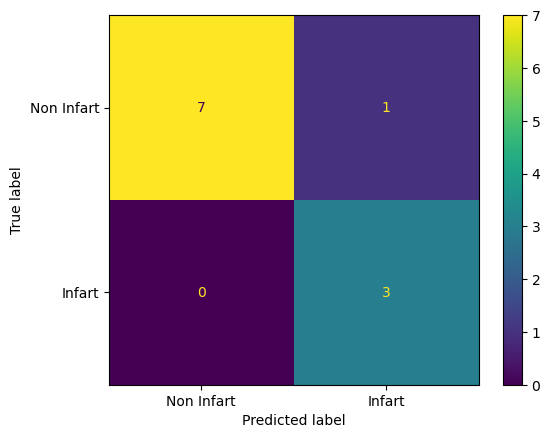

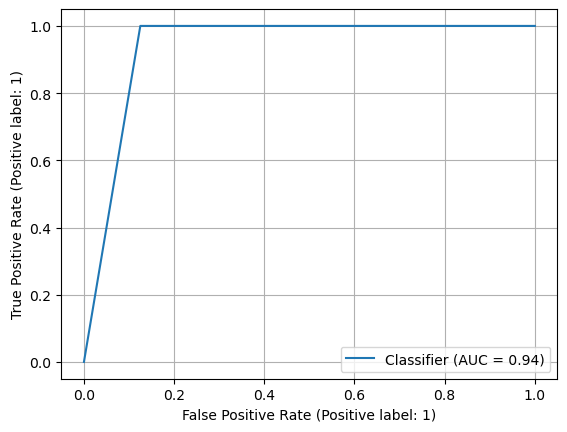

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




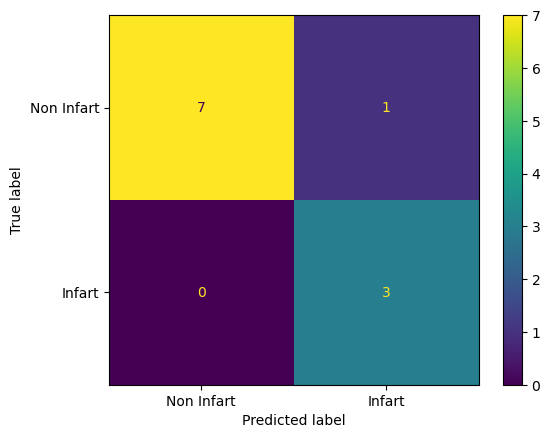

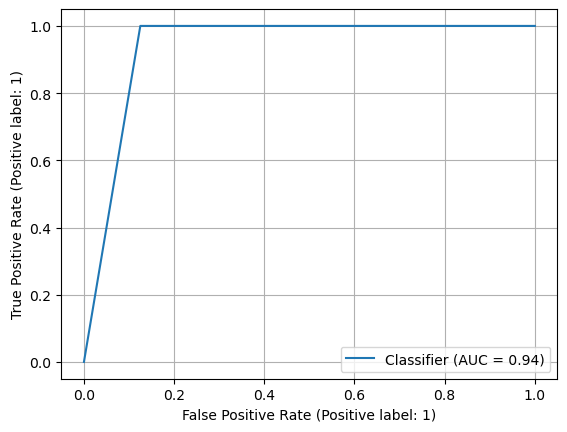

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




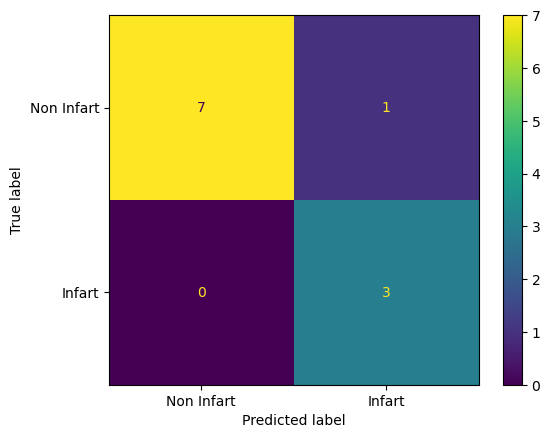

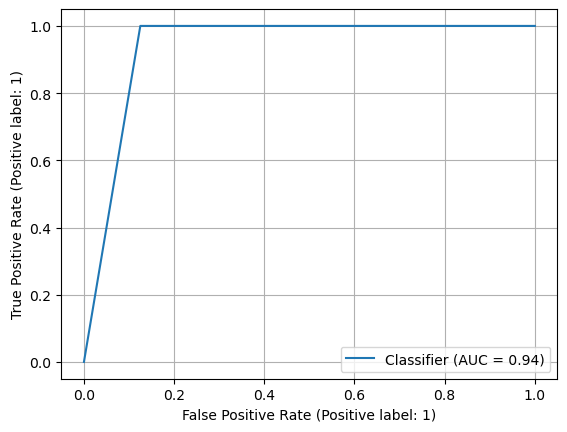

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




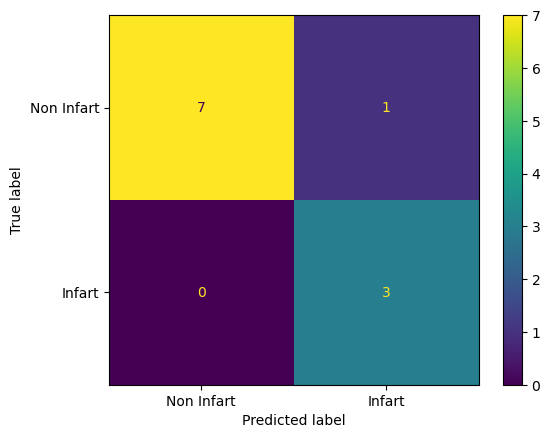

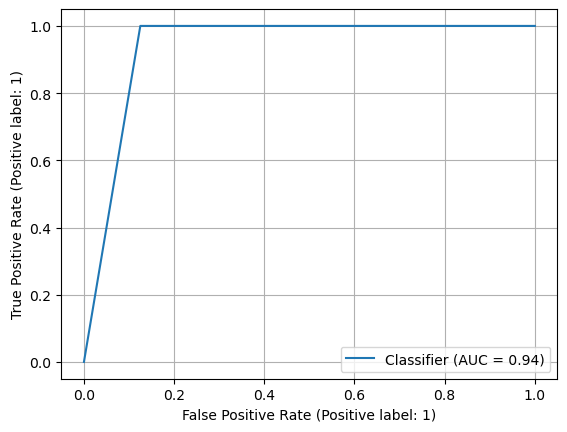

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




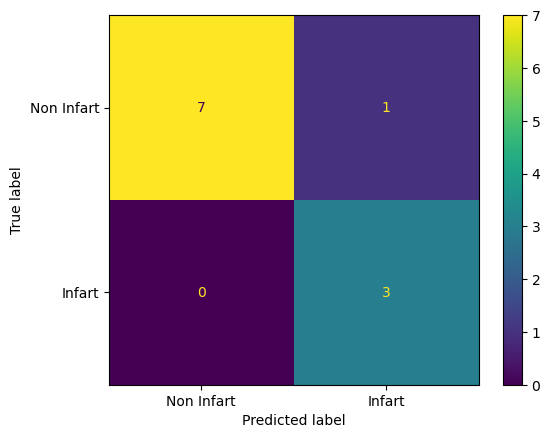

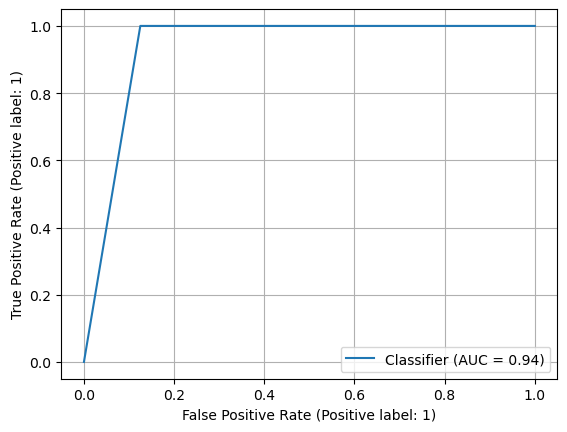

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




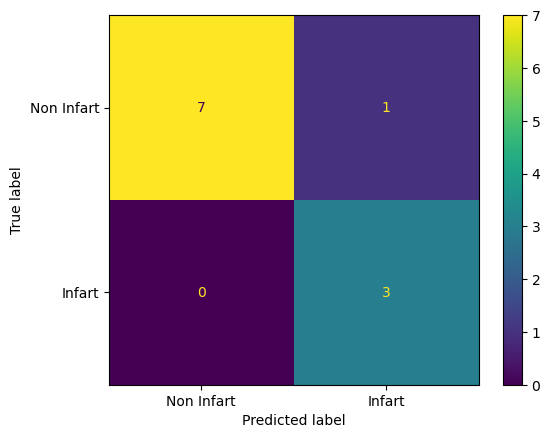

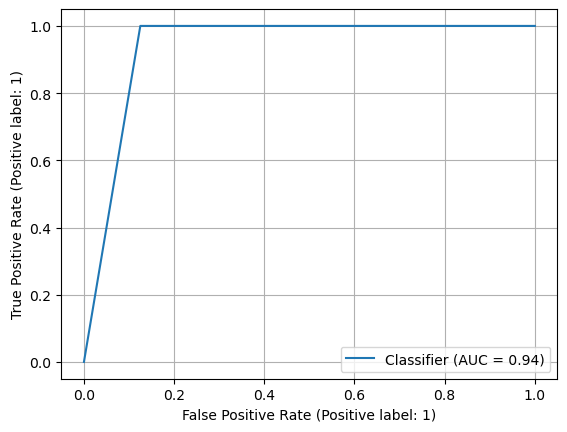

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




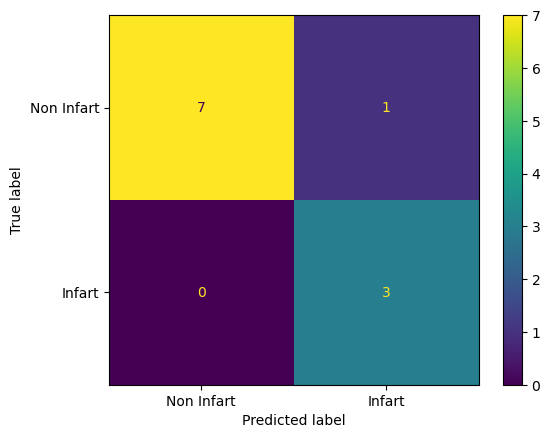

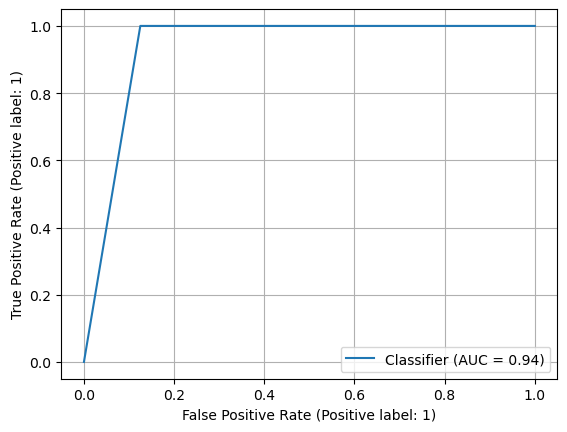

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




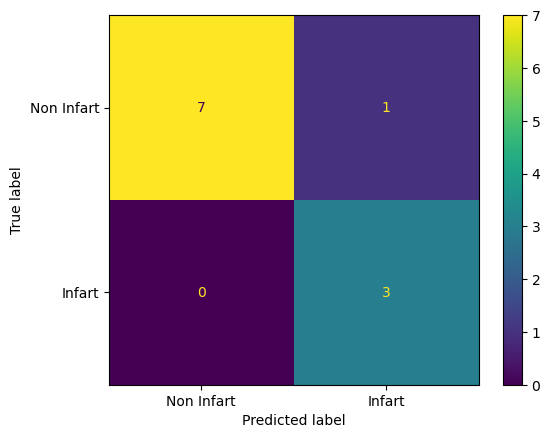

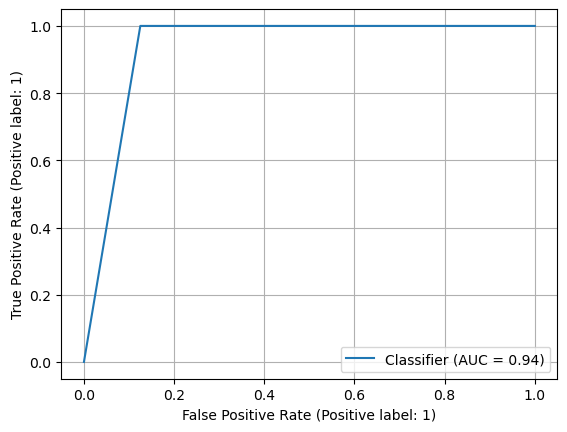

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




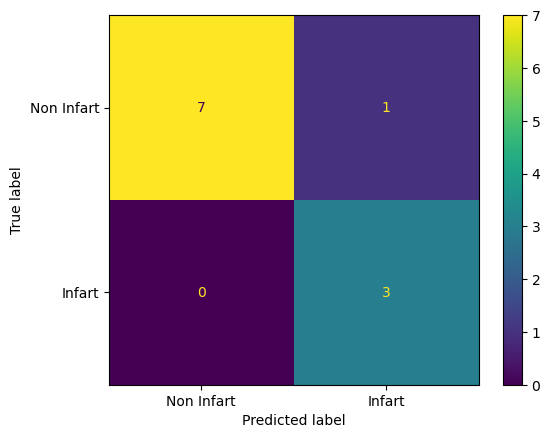

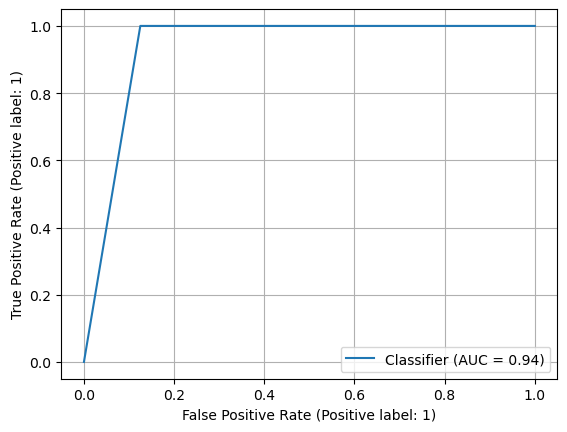

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




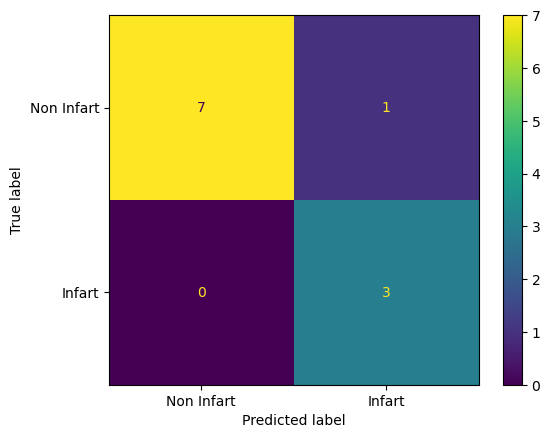

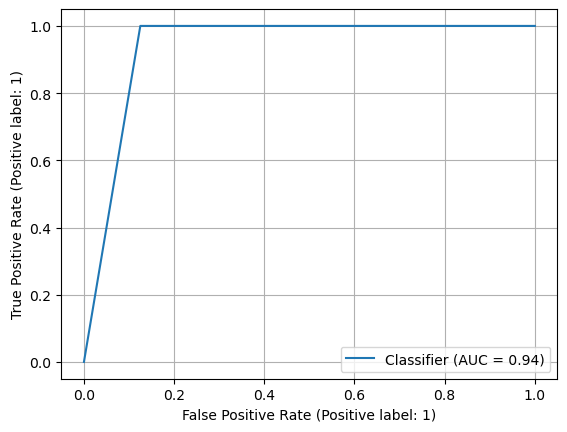

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




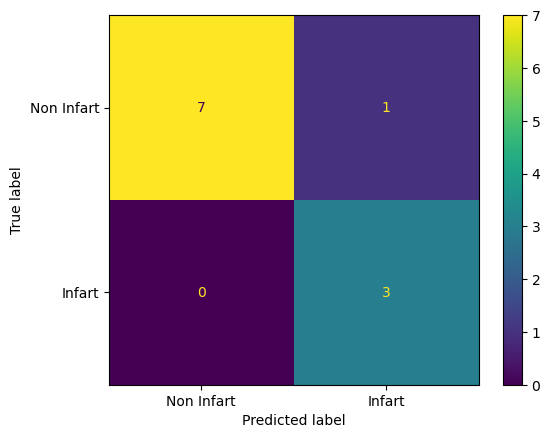

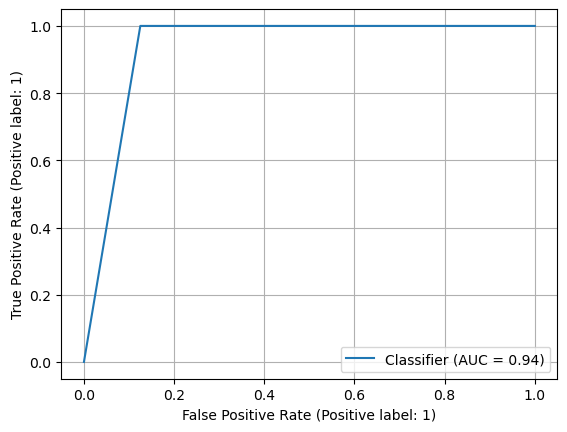

Number of samples: 11
Specificity= 0.75
Sensibility= 1.0
False positive rate = 0.25




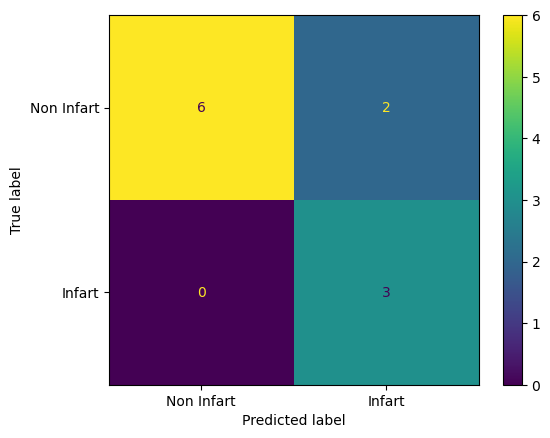

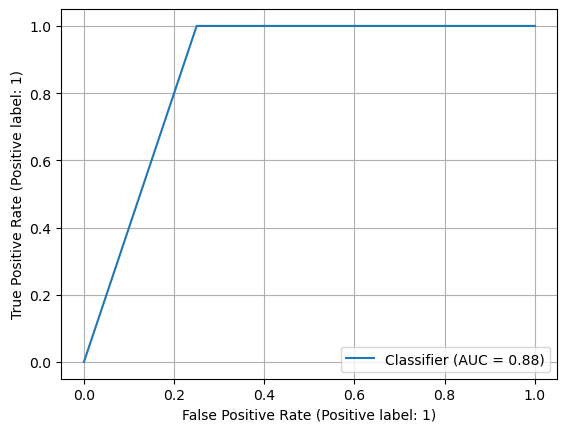

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




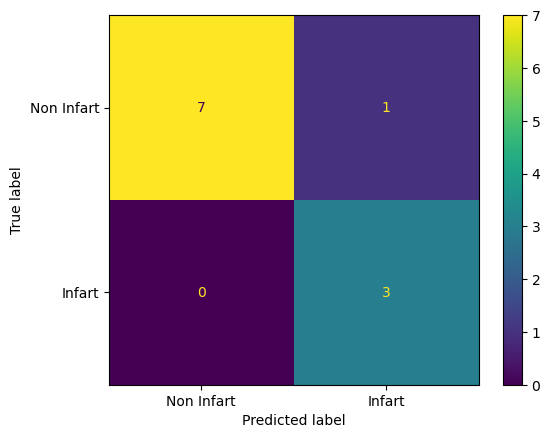

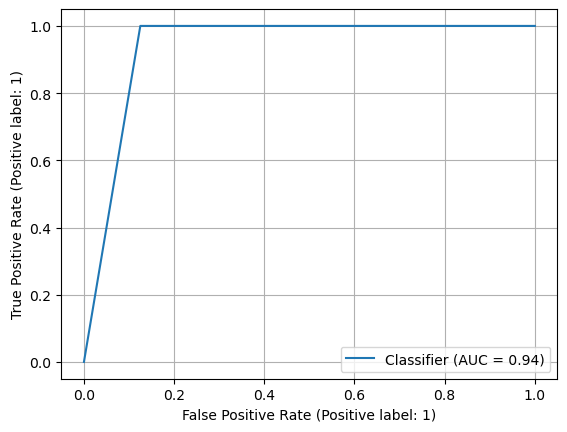

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




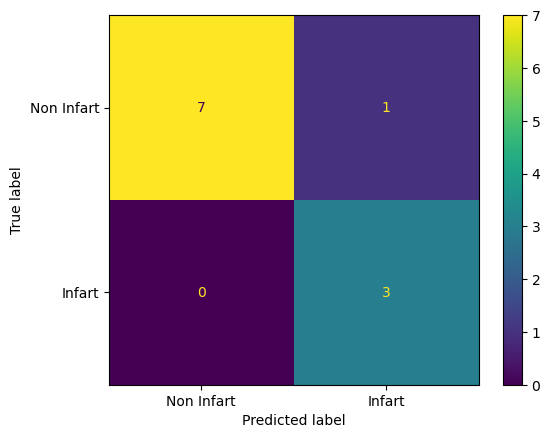

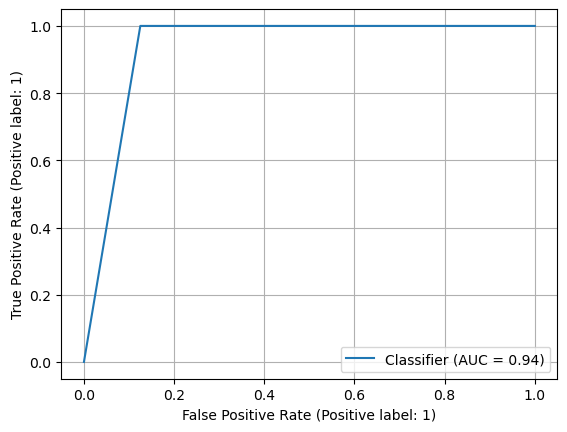

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




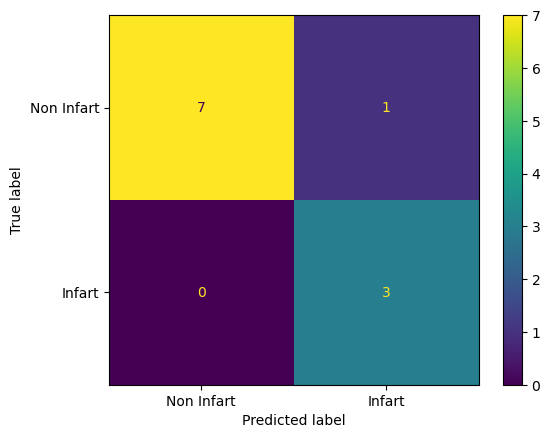

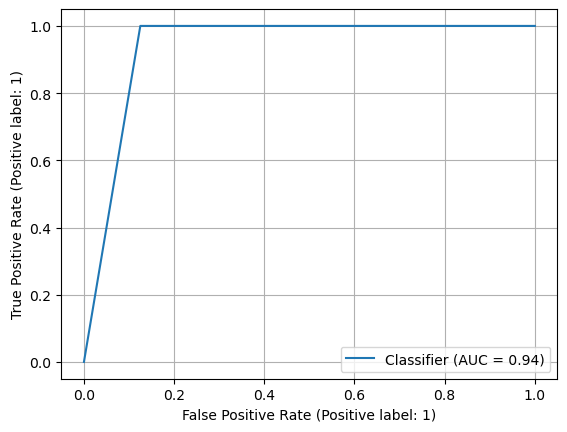

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




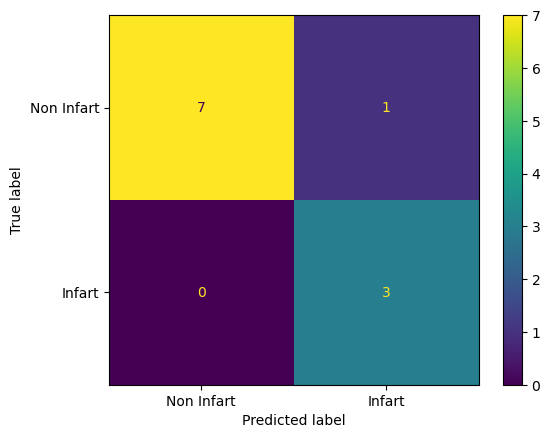

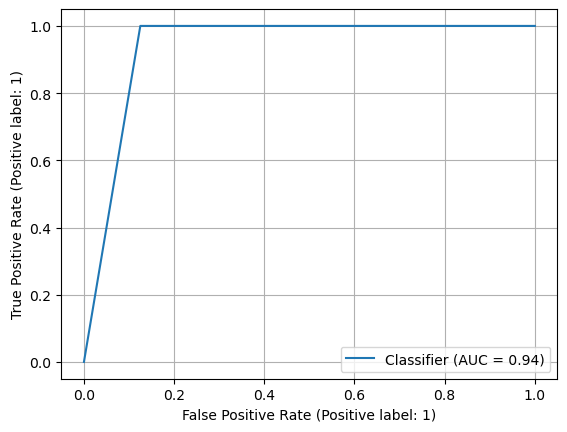

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




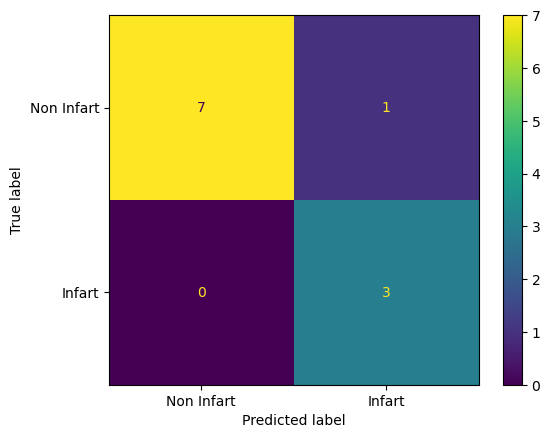

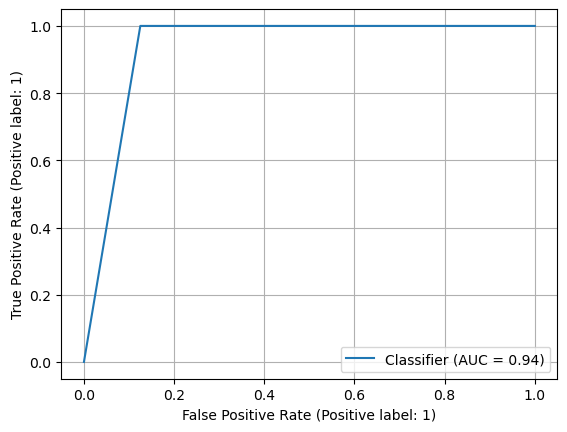

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




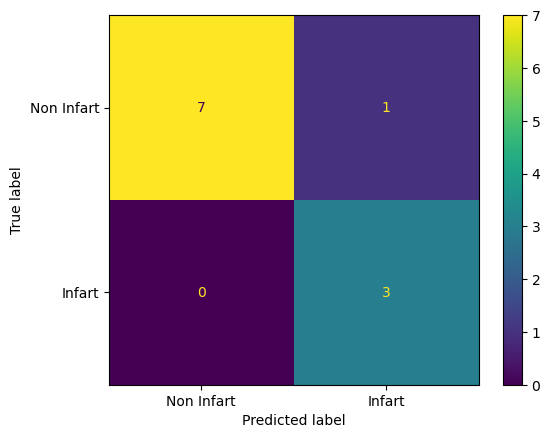

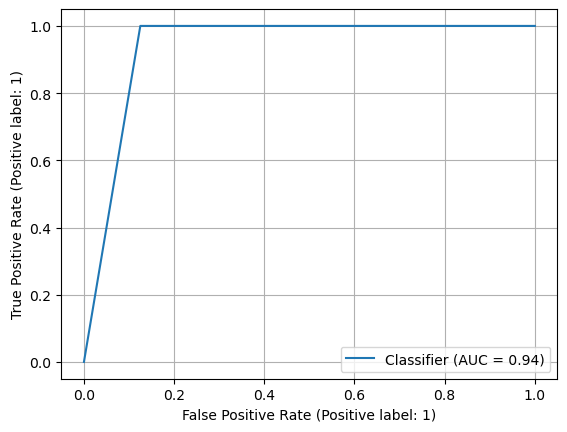

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




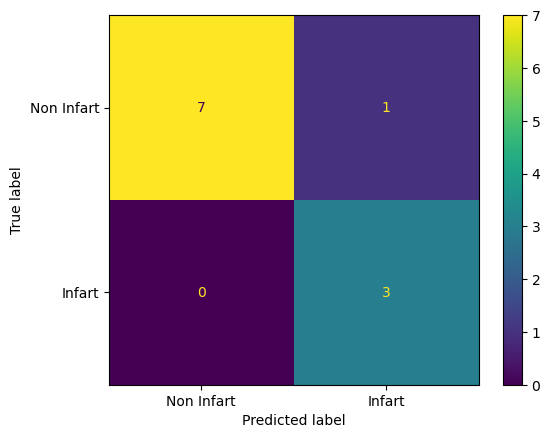

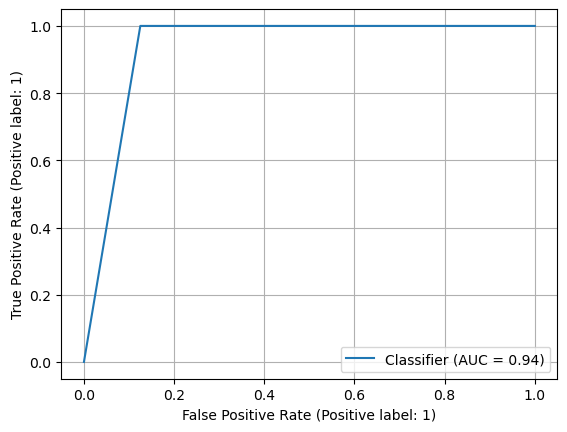

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




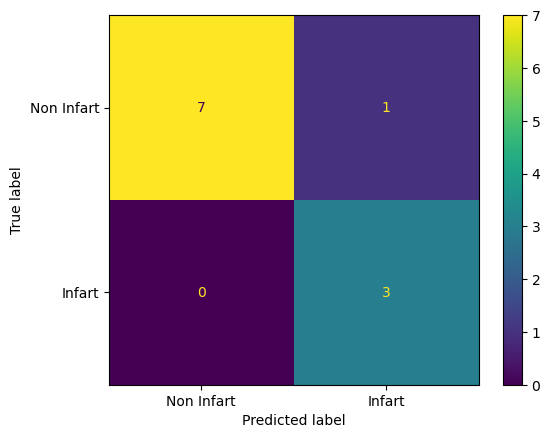

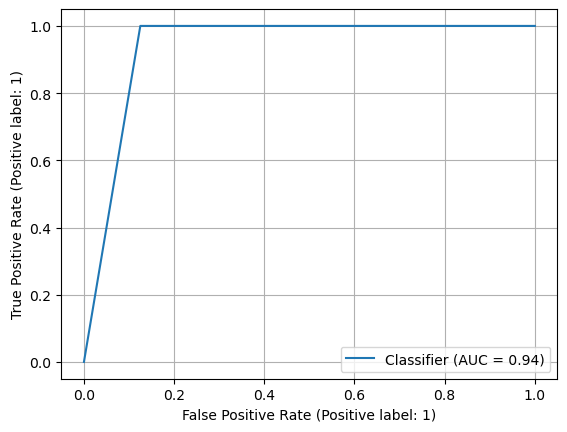

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




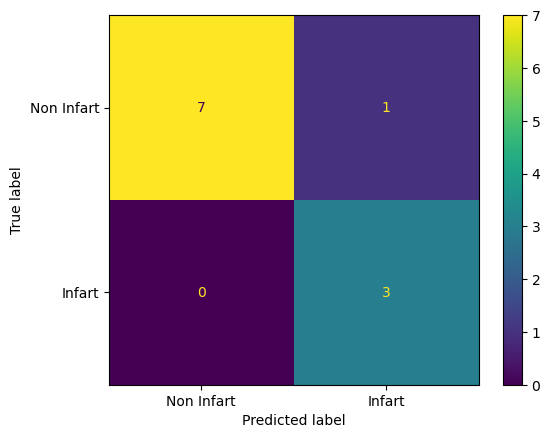

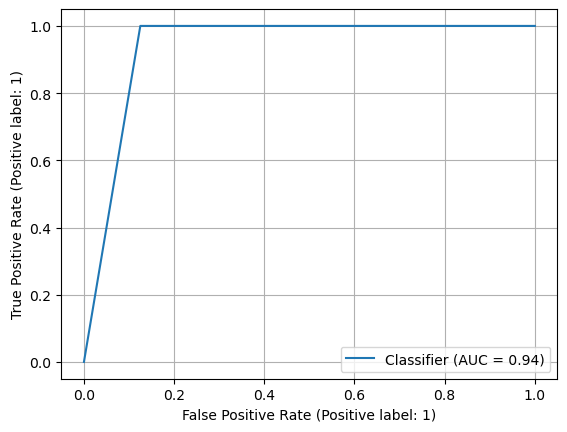

Number of samples: 11
Specificity= 0.5
Sensibility= 1.0
False positive rate = 0.5




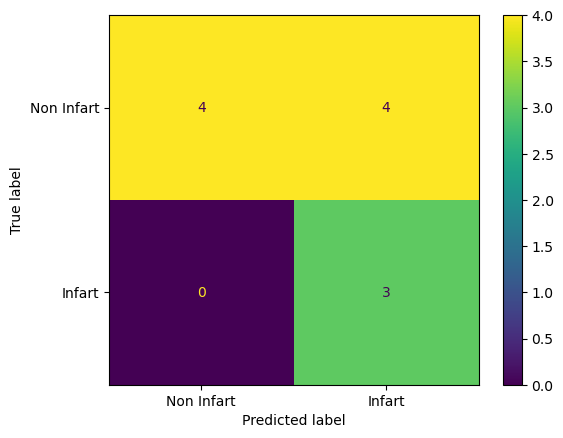

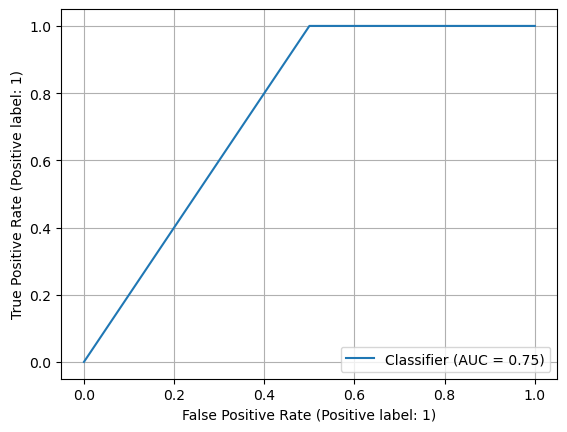

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




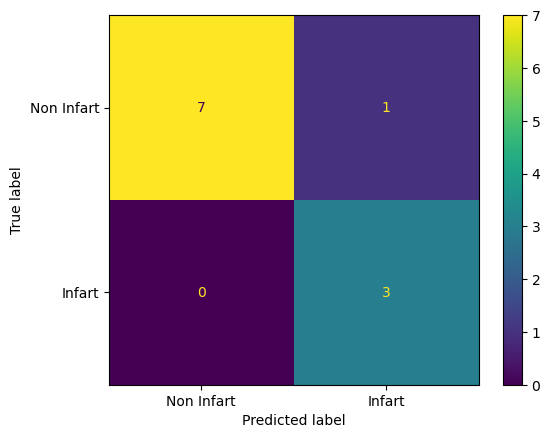

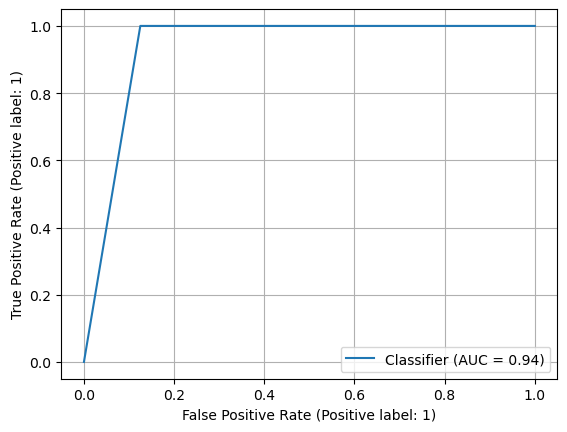

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




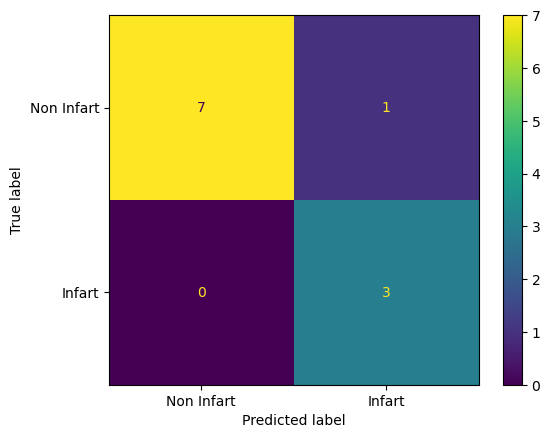

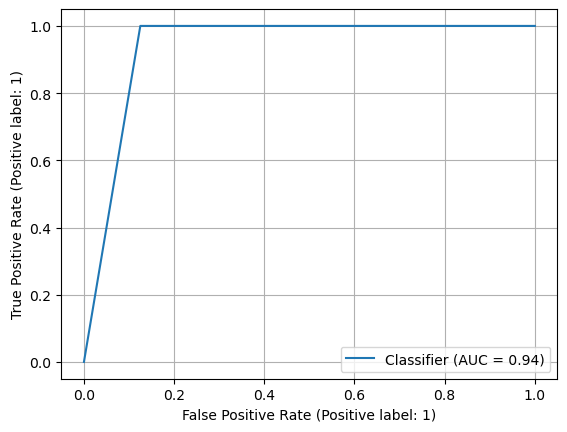

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




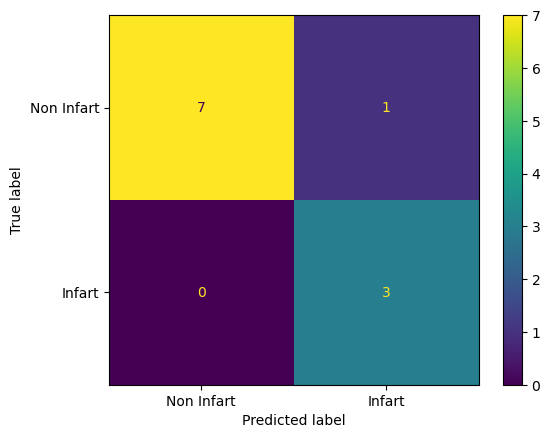

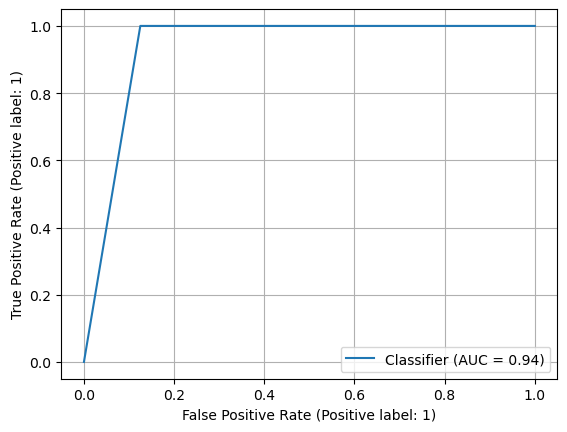

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




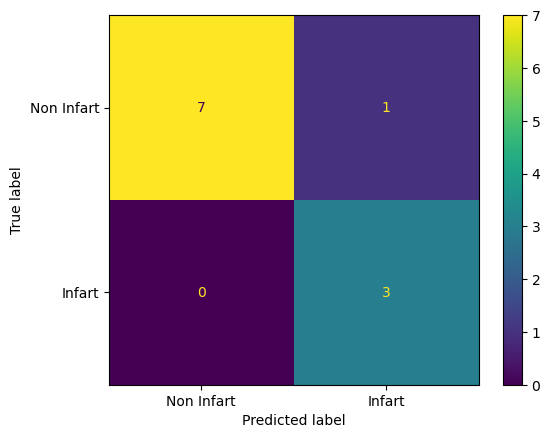

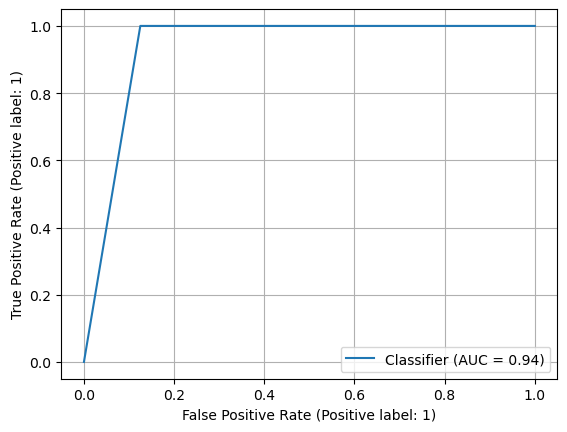

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




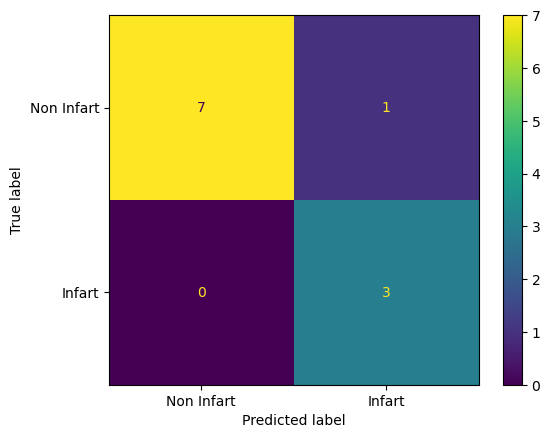

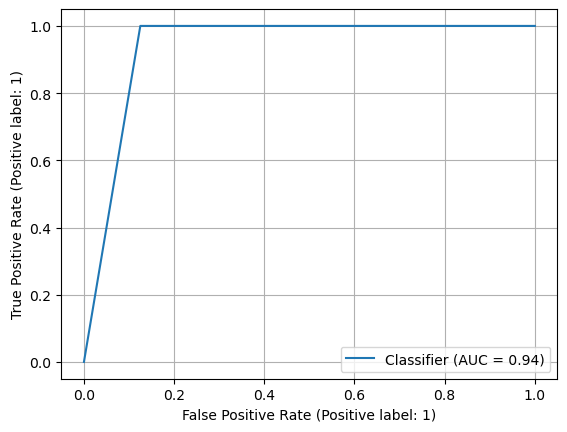

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




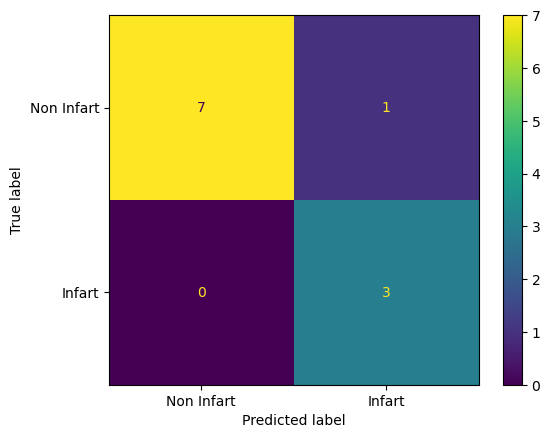

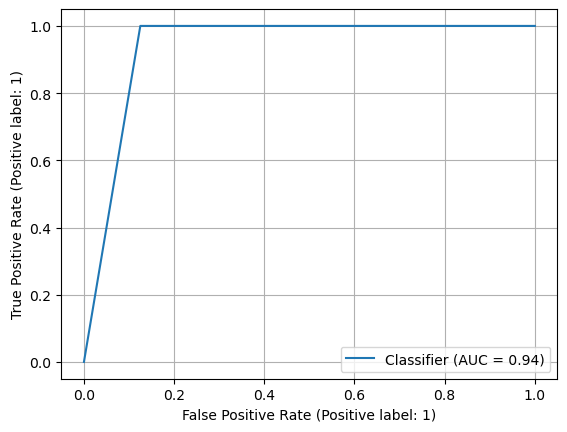

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




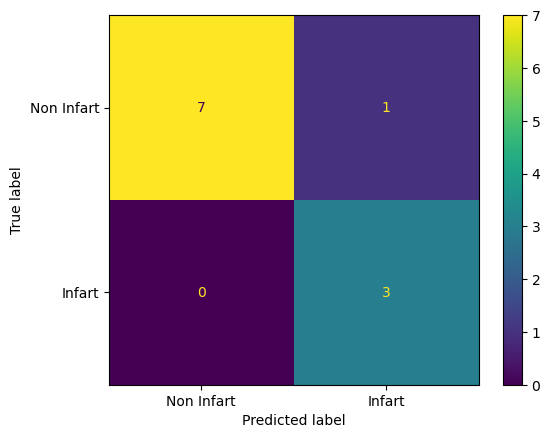

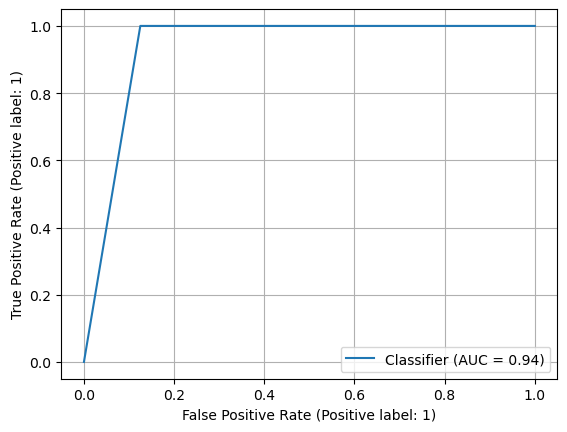

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




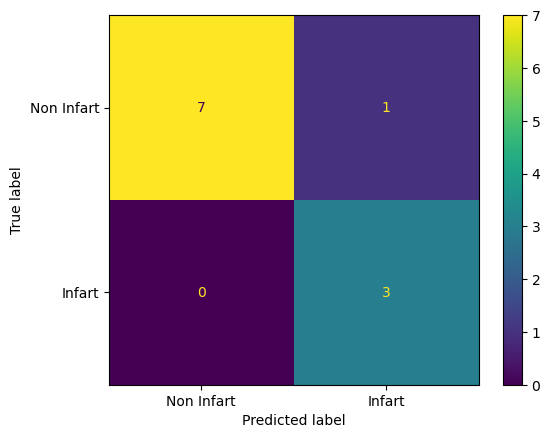

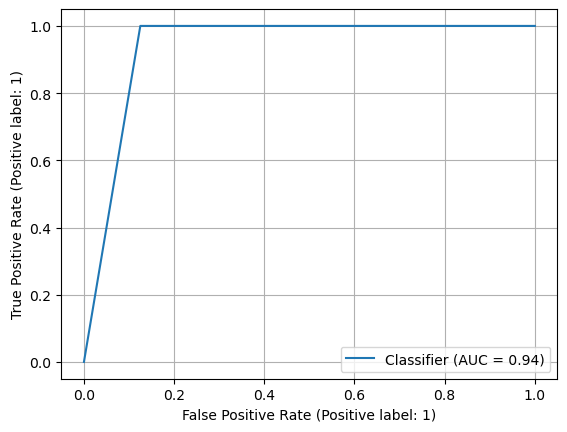

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




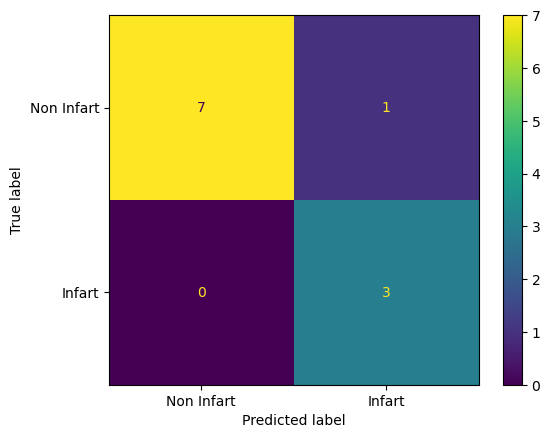

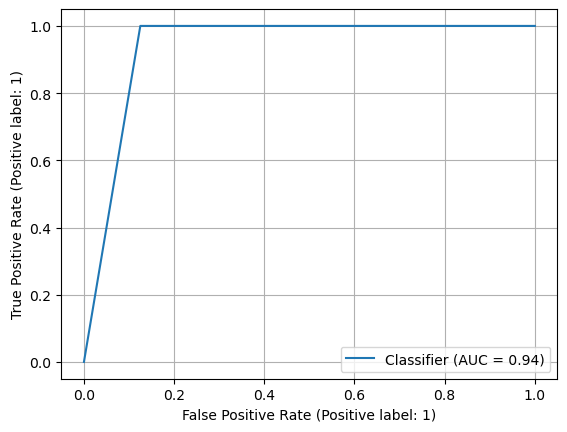

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




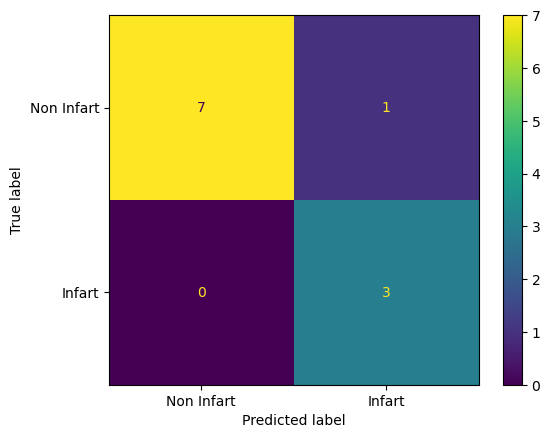

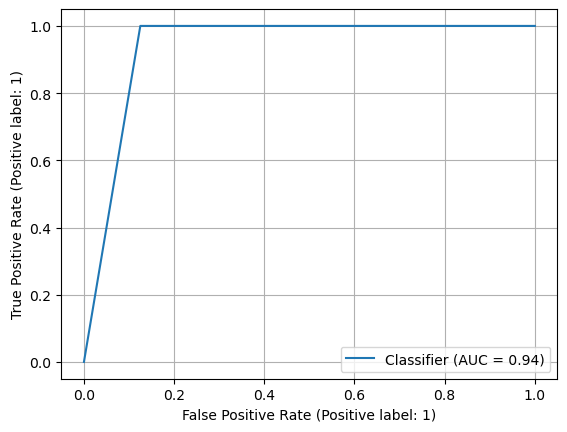

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




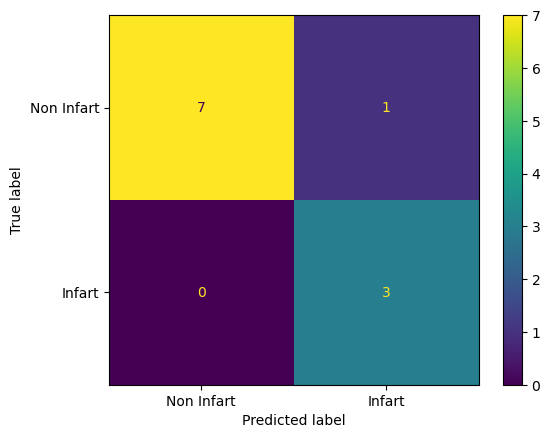

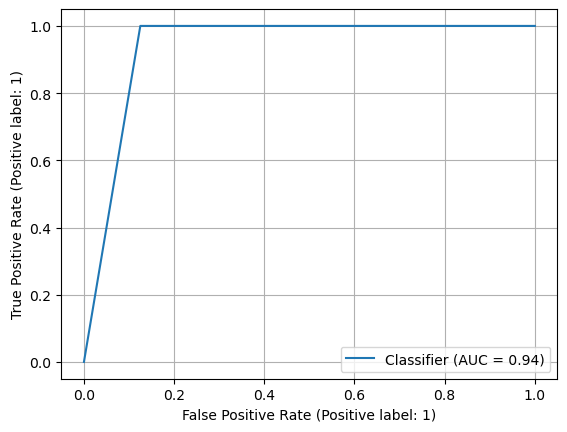

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




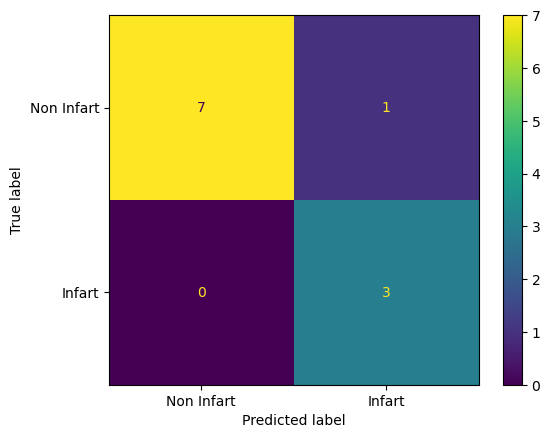

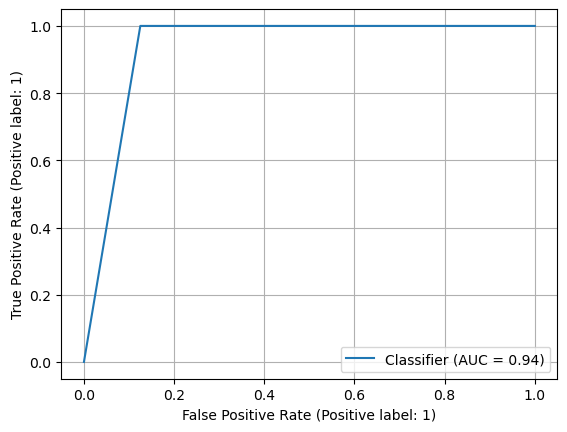

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




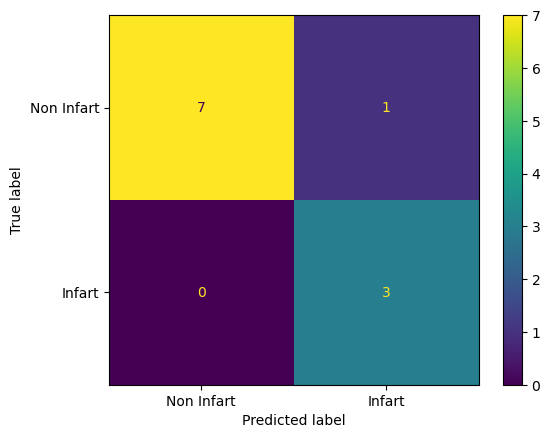

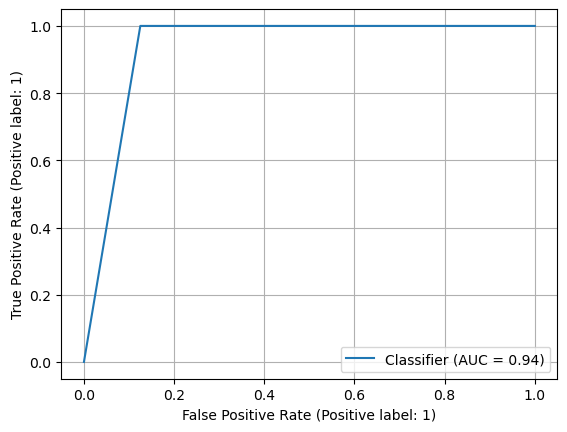

Mean Specificity= 0.8607954545454546 Std: 0.06086444683417201
Mean Sensibility= 1.0  Std: 0.0
Mean False Positive Rate= 0.13920454545454544  Std: 0.06086444683417202


In [12]:
scores = cross_validate(grid_result.best_estimator_, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1, return_estimator=True)
evaluate_kfold(scores['estimator'], X_test, y_test)

# Decision Tree

In [13]:
param_grid_deci_tree = {
    'criterion': ['gini', 'entropy', 'log_loss']
}

{'criterion': 'entropy'}
Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




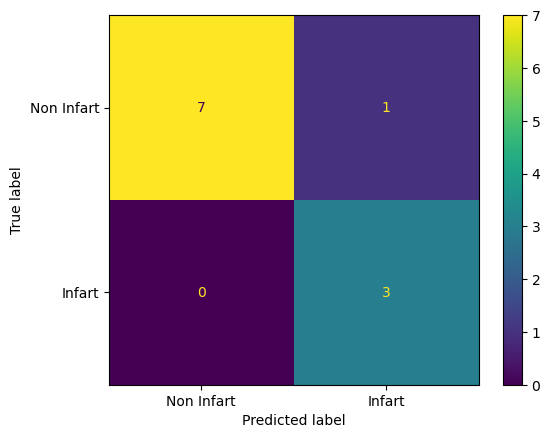

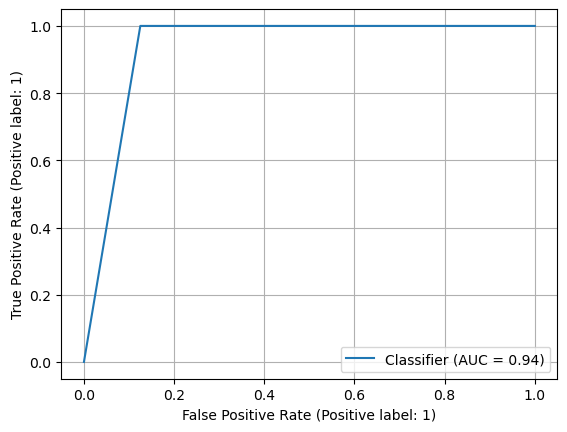

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




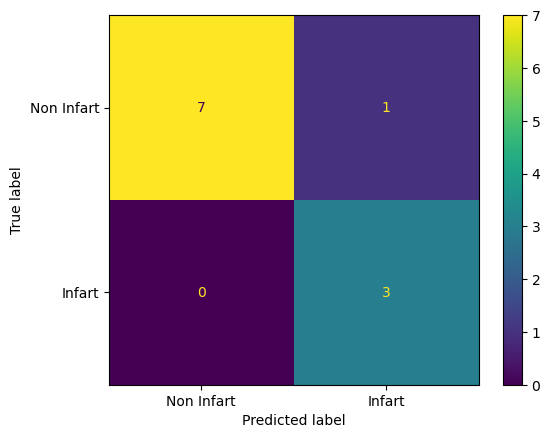

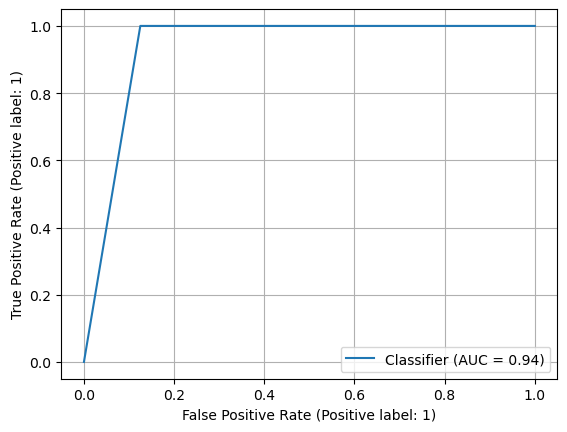

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




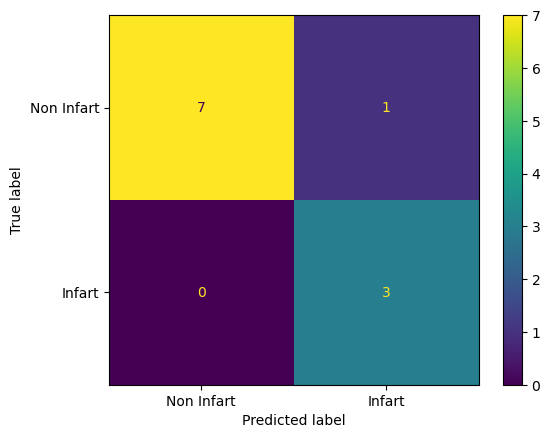

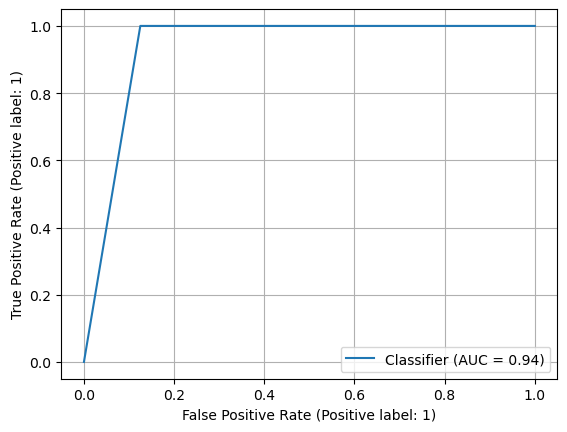

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




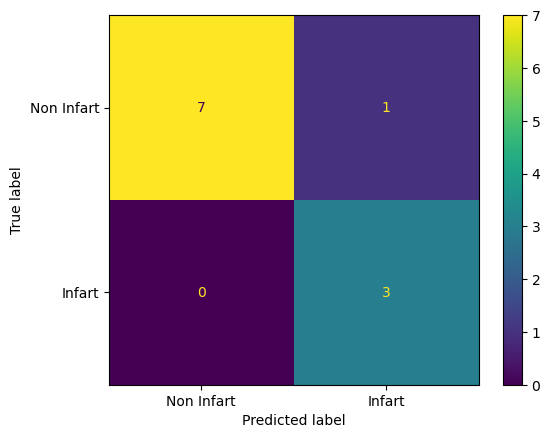

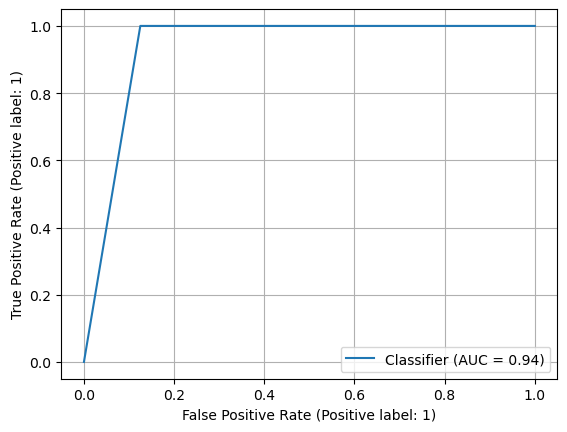

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




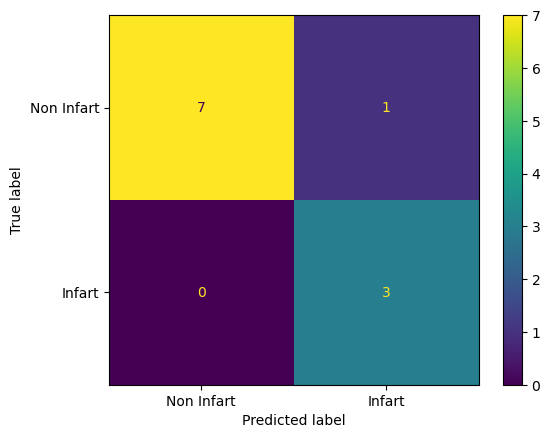

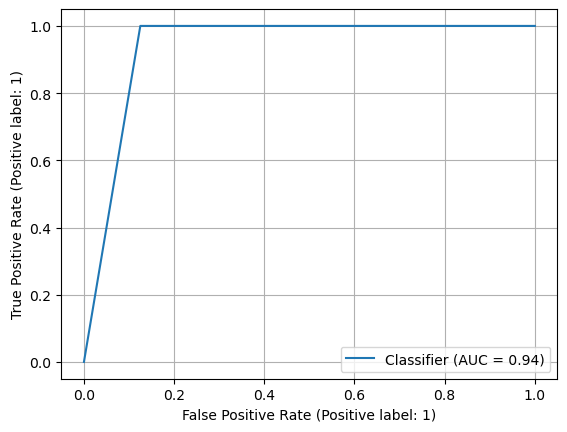

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




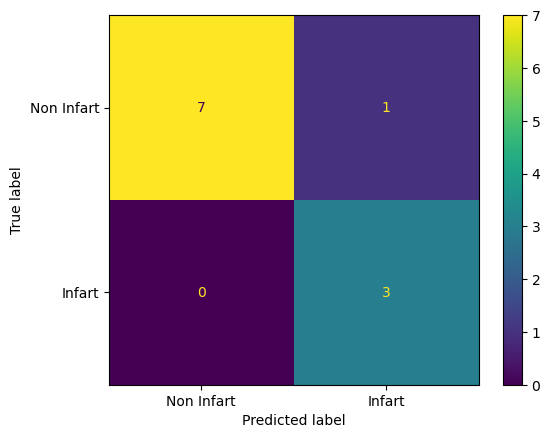

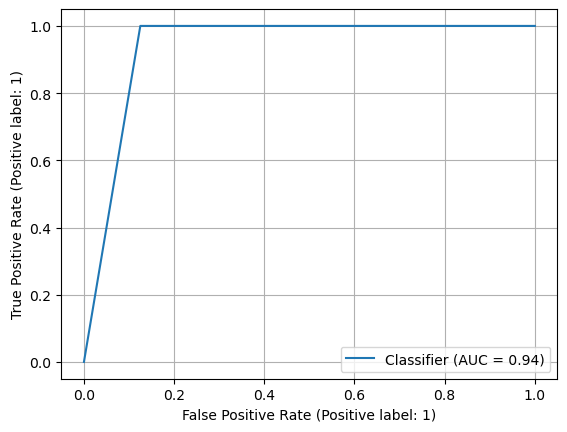

Number of samples: 11
Specificity= 0.75
Sensibility= 1.0
False positive rate = 0.25




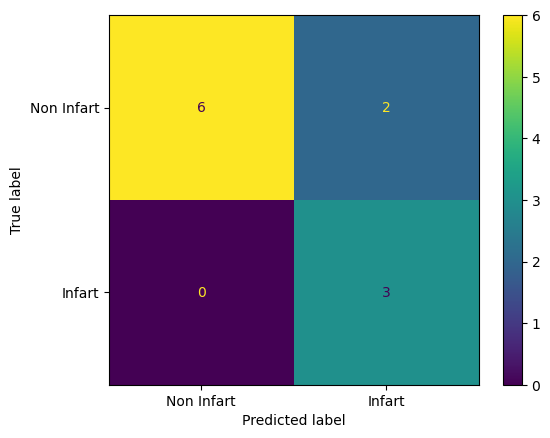

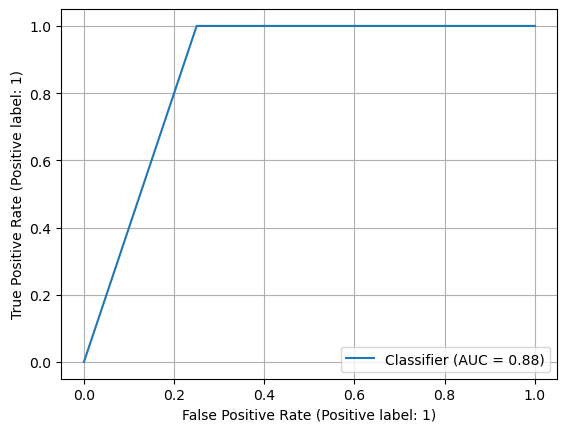

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




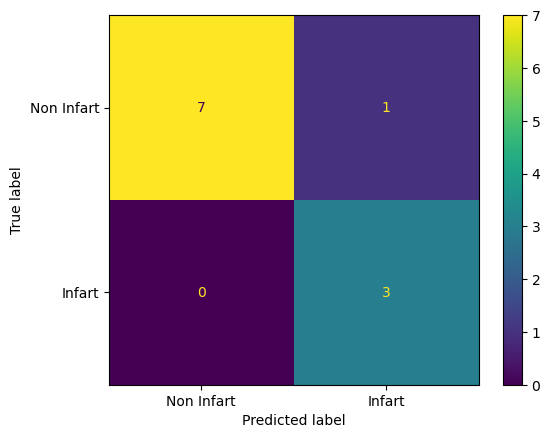

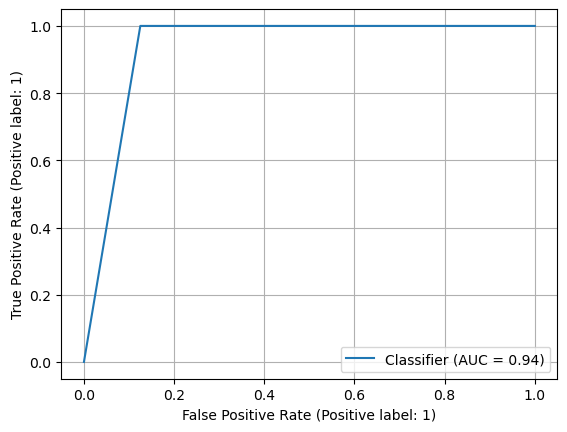

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




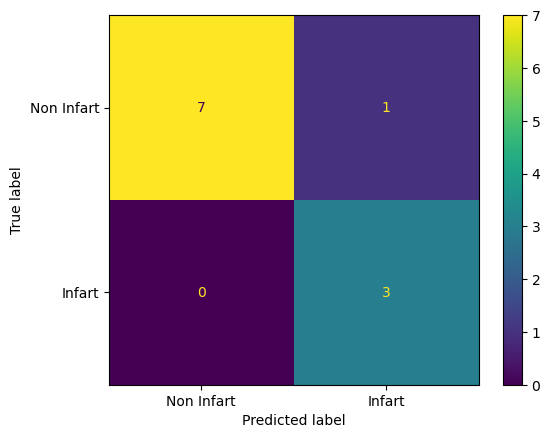

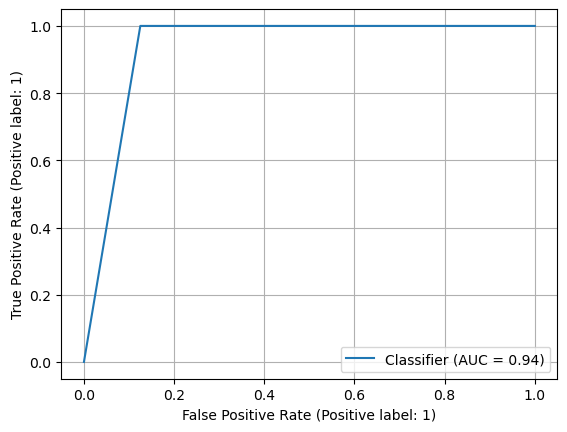

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




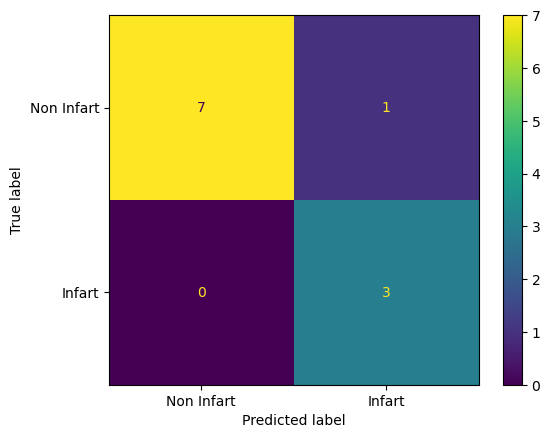

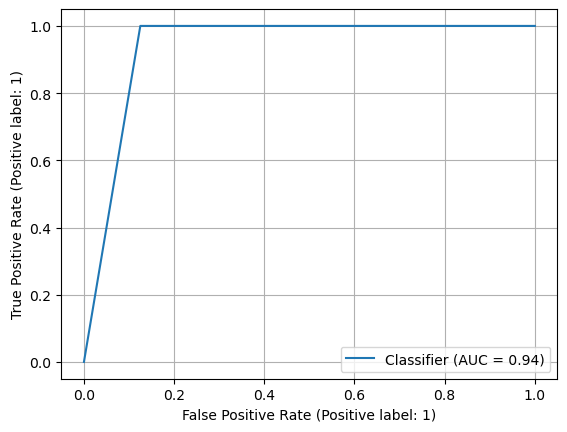

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




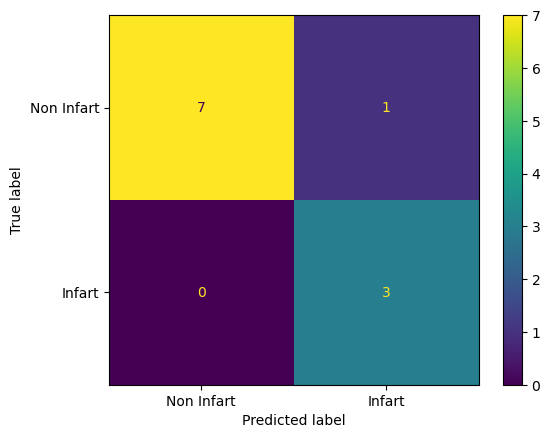

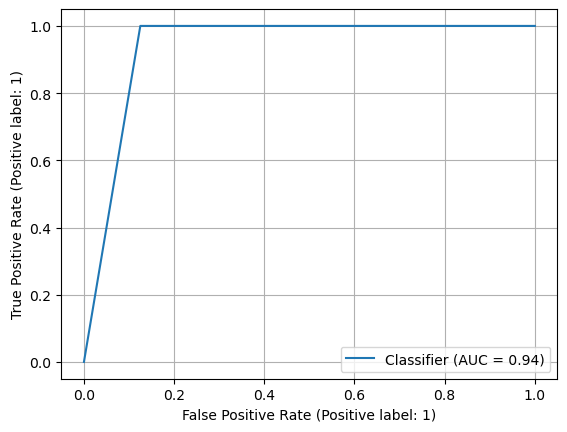

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




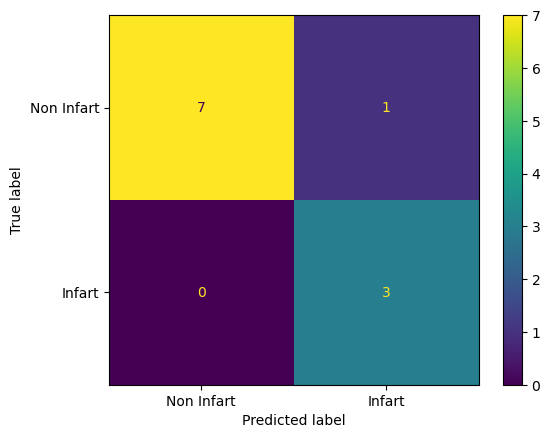

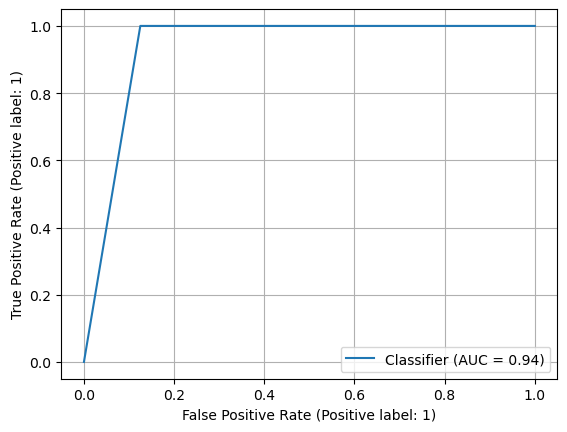

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




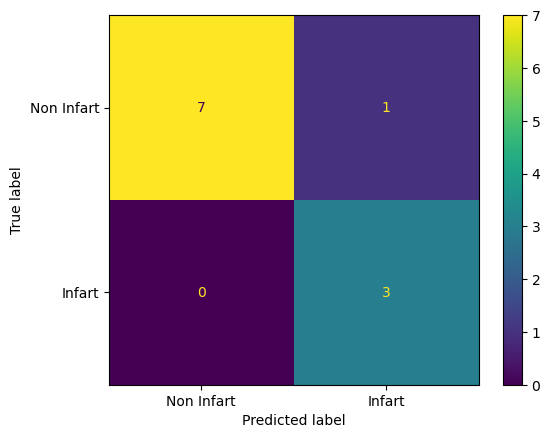

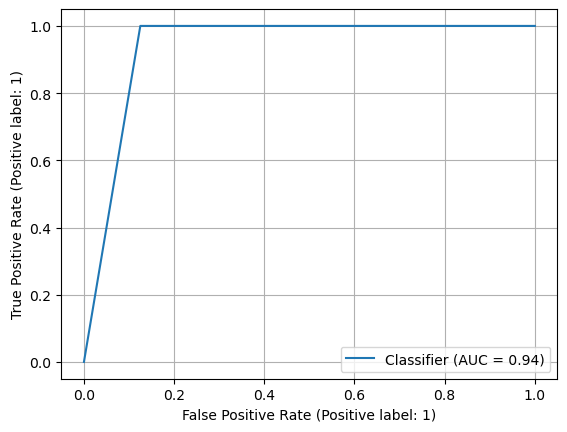

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




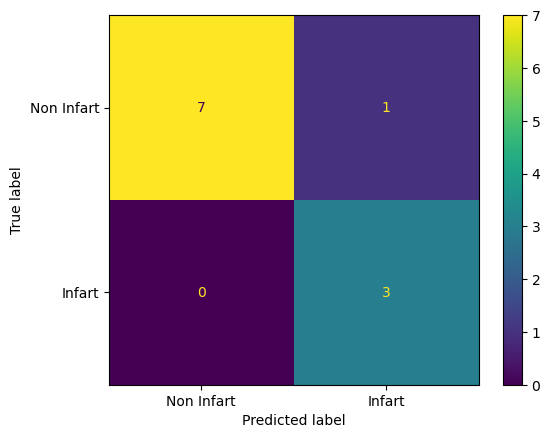

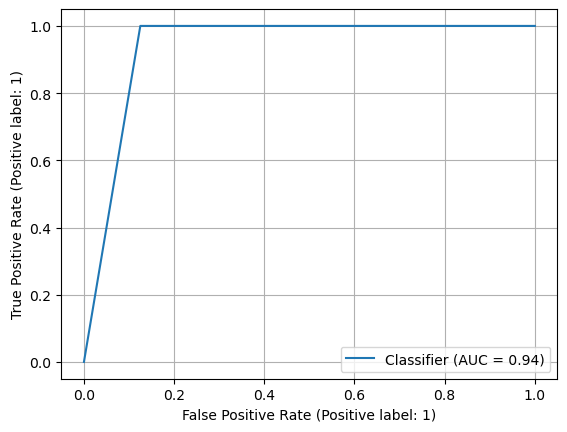

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




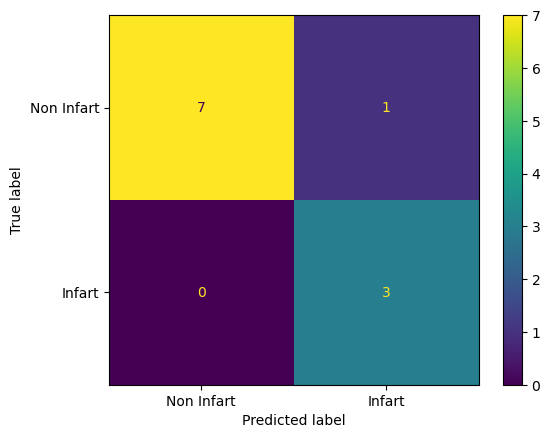

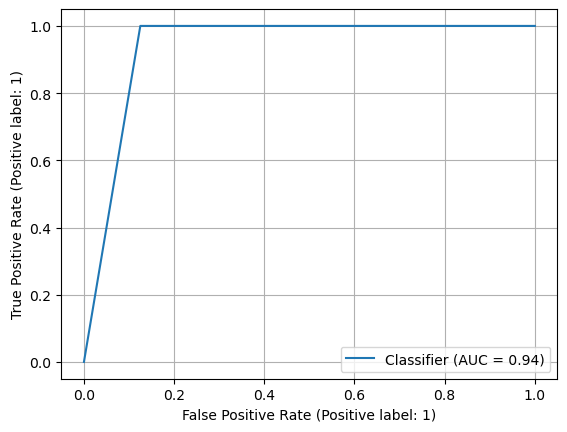

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




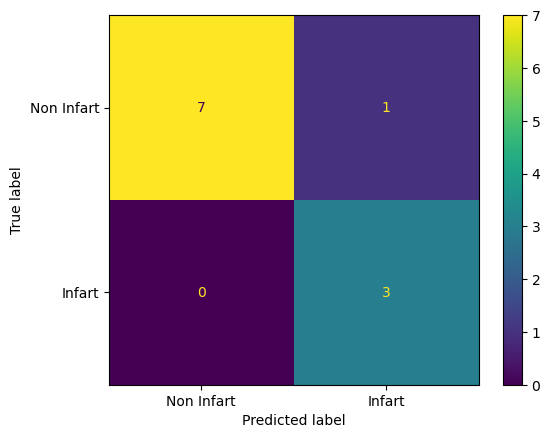

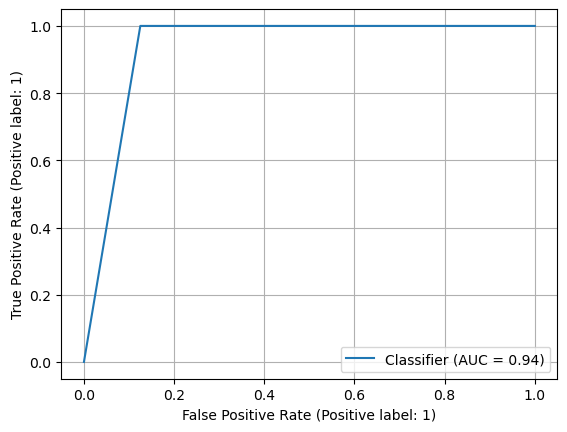

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




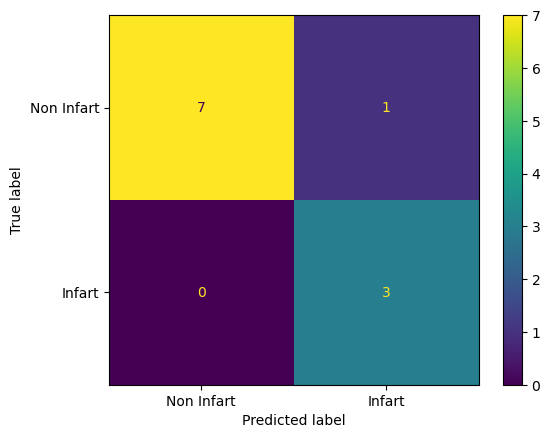

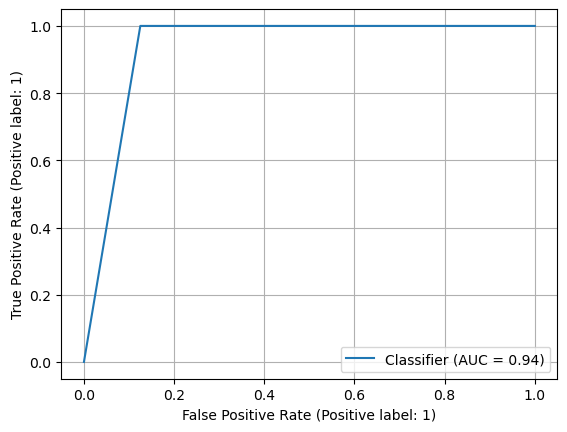

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




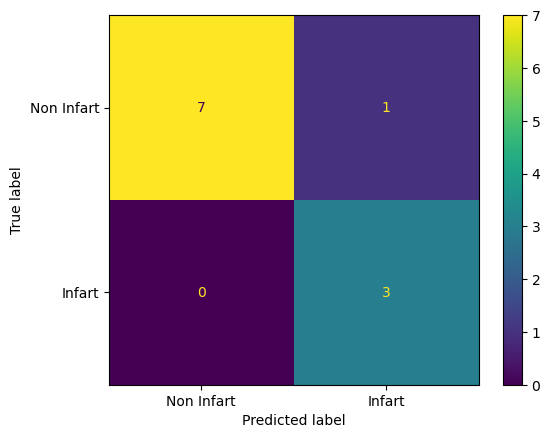

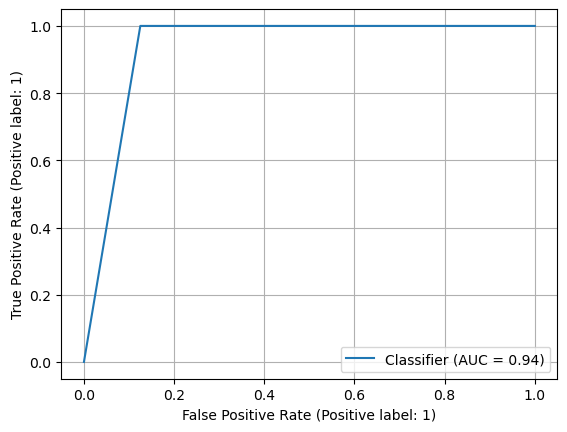

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




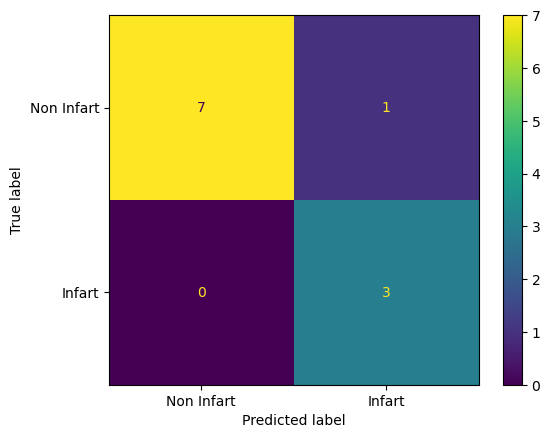

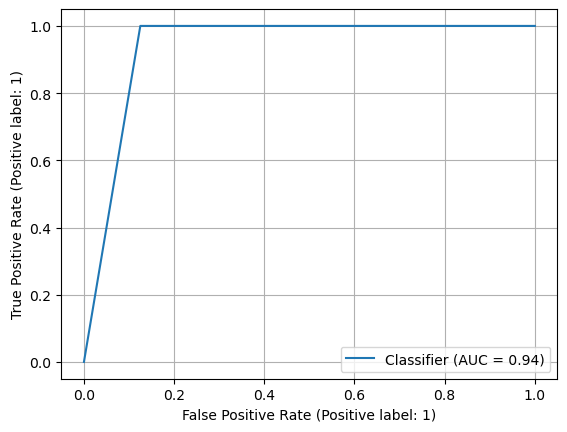

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




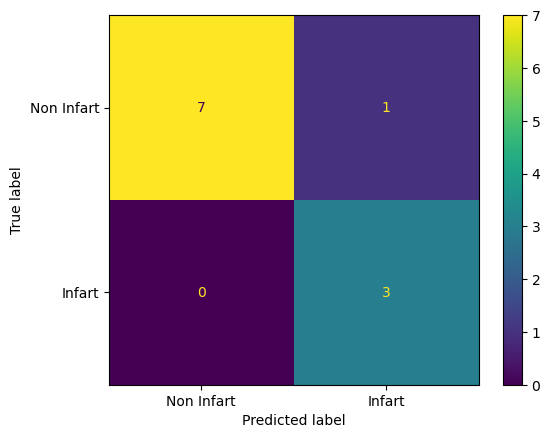

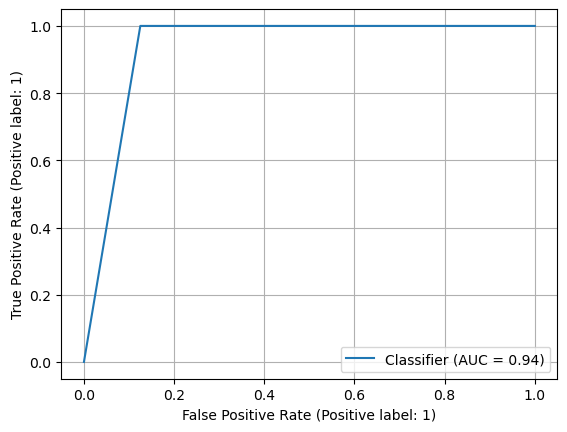

Number of samples: 11
Specificity= 0.75
Sensibility= 1.0
False positive rate = 0.25




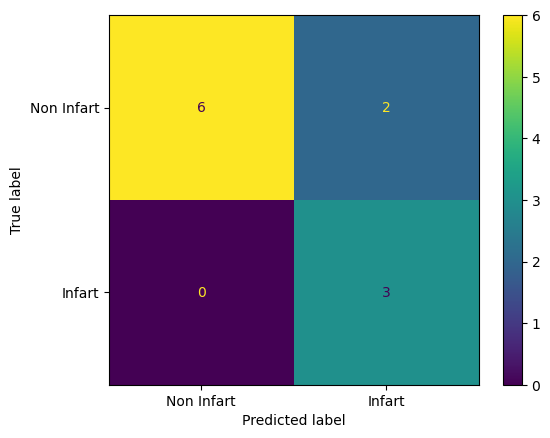

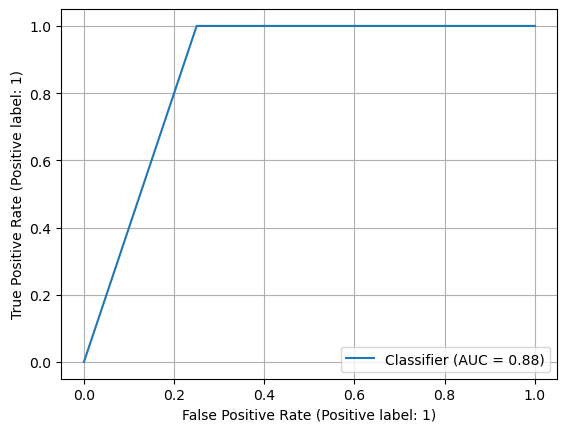

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




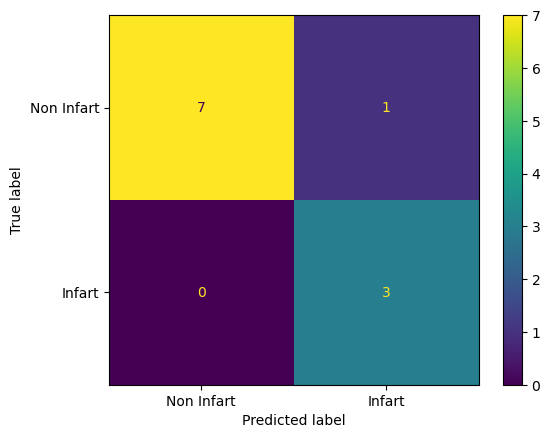

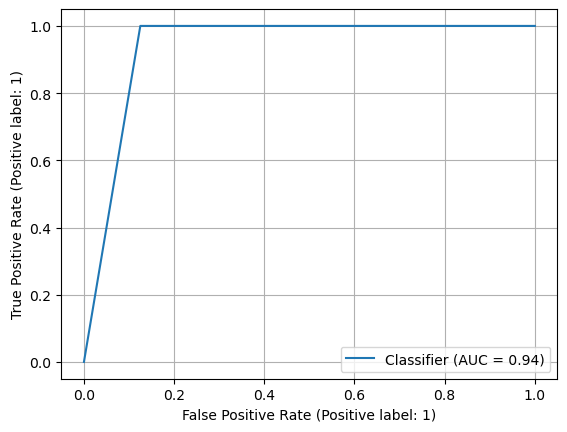

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




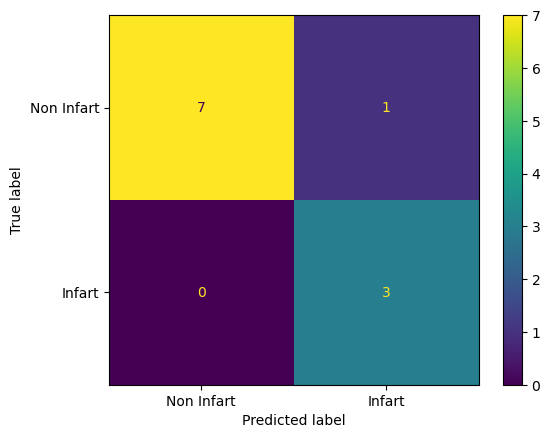

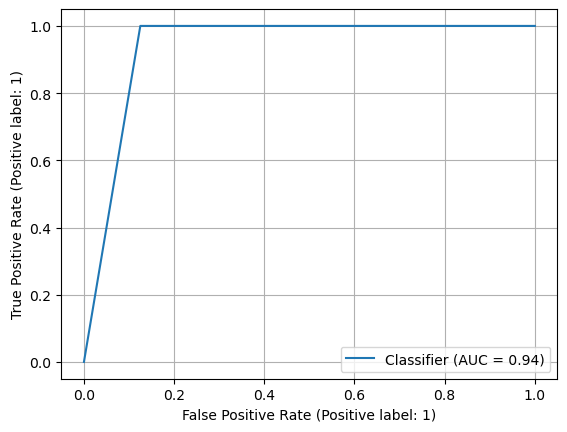

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




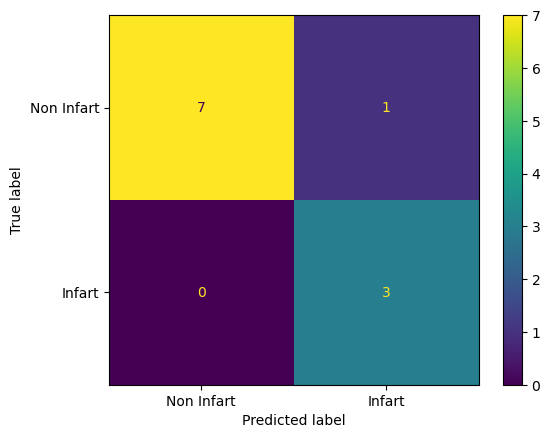

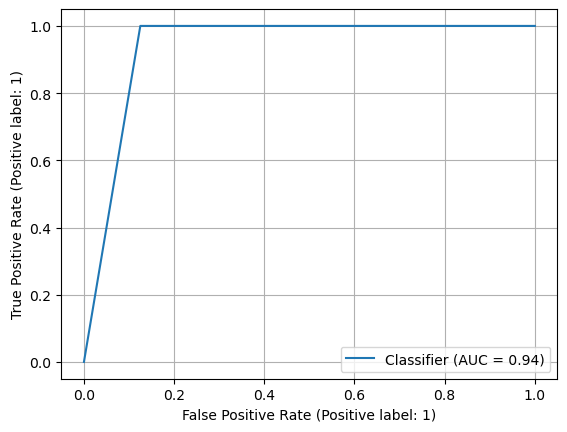

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




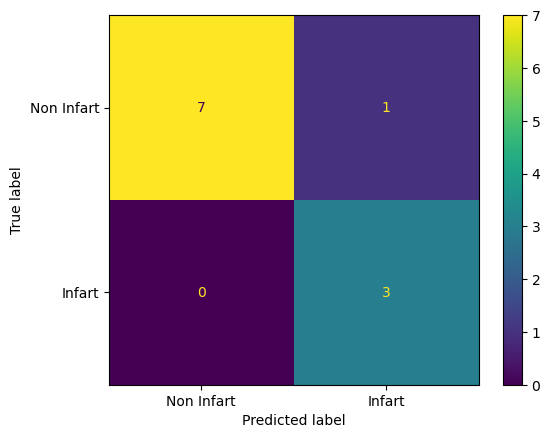

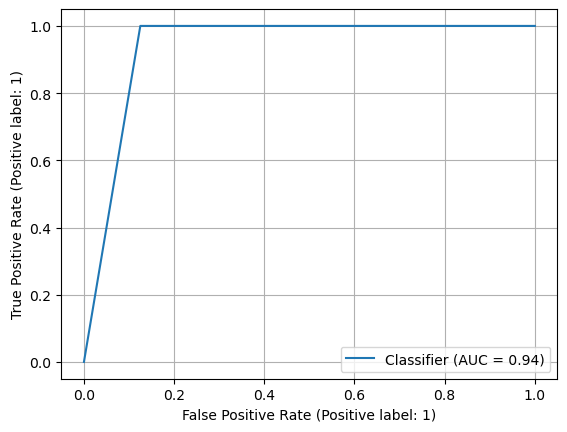

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




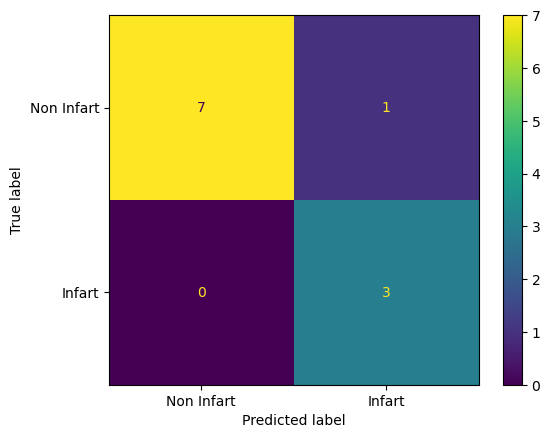

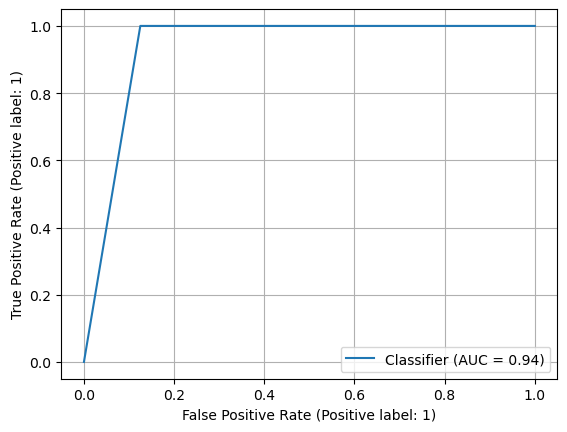

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




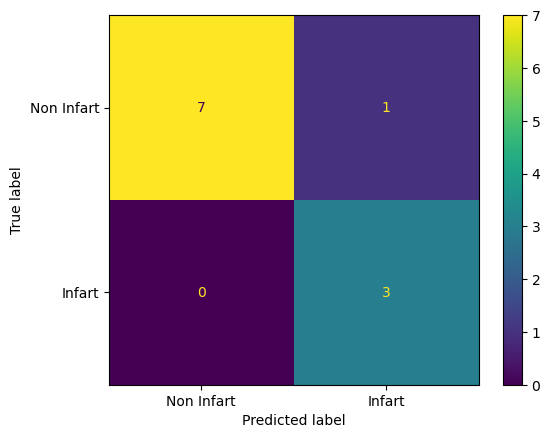

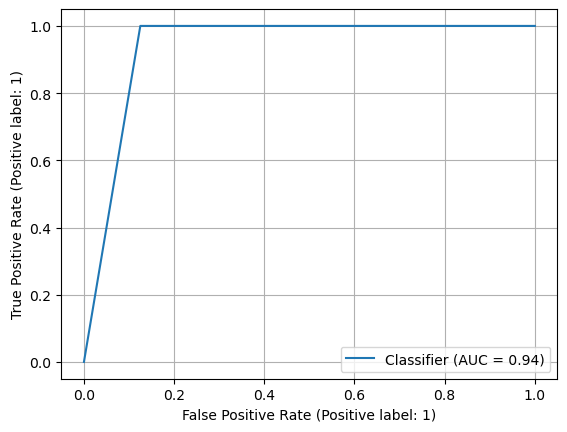

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




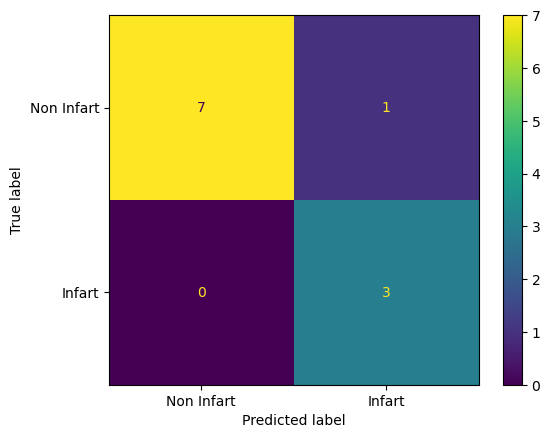

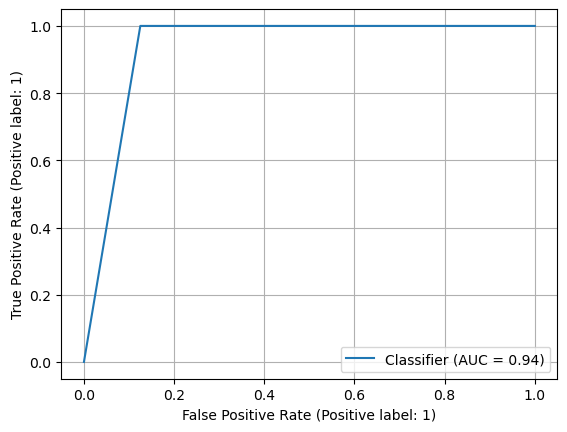

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




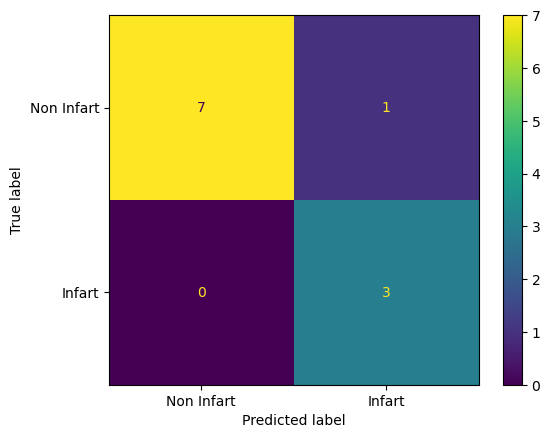

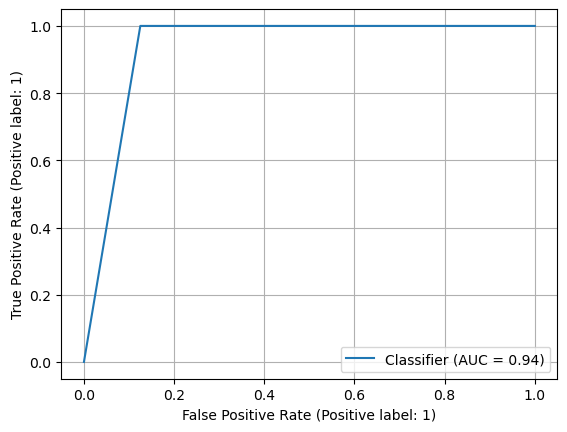

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




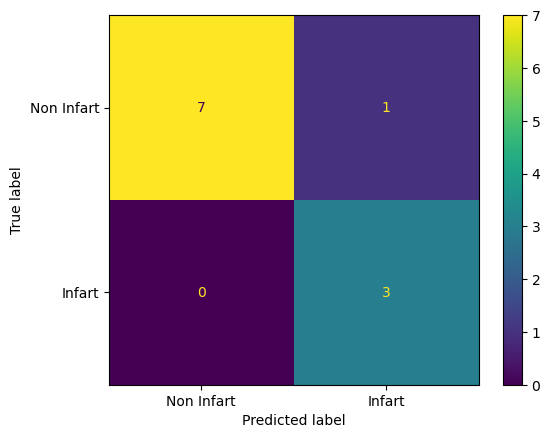

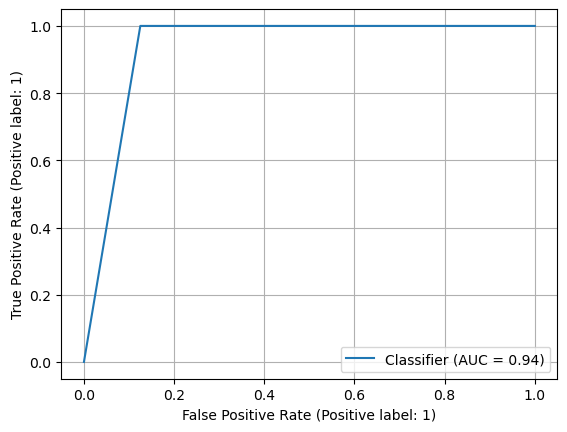

Number of samples: 11
Specificity= 0.5
Sensibility= 1.0
False positive rate = 0.5




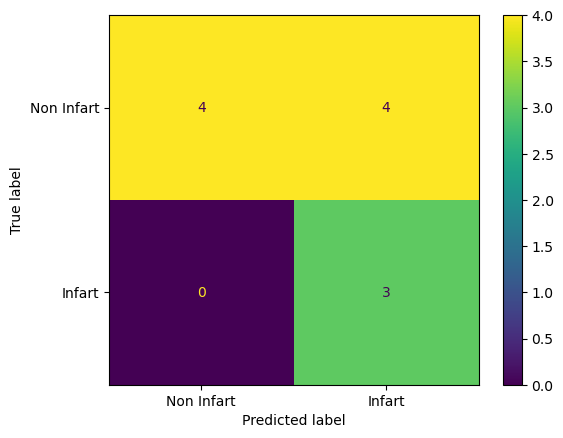

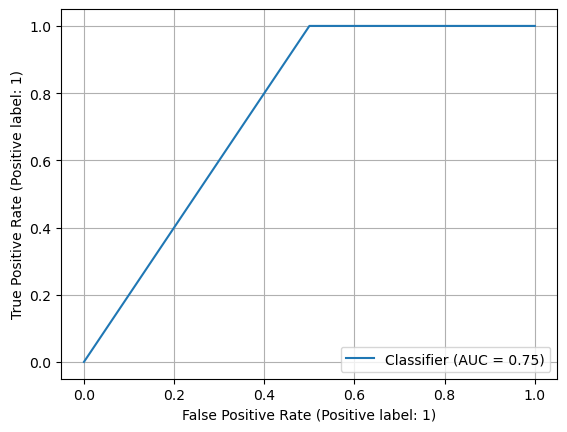

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




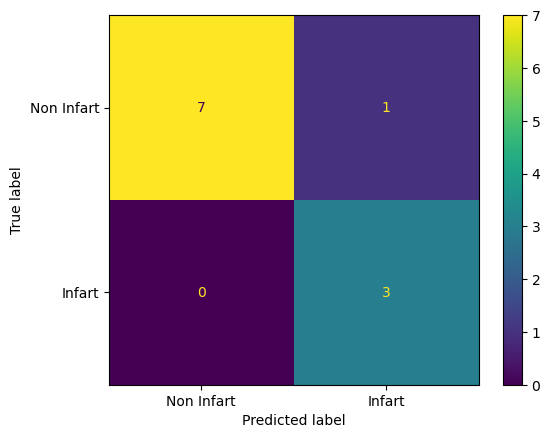

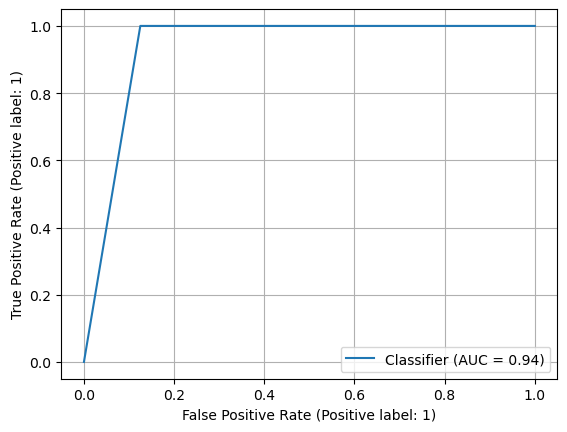

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




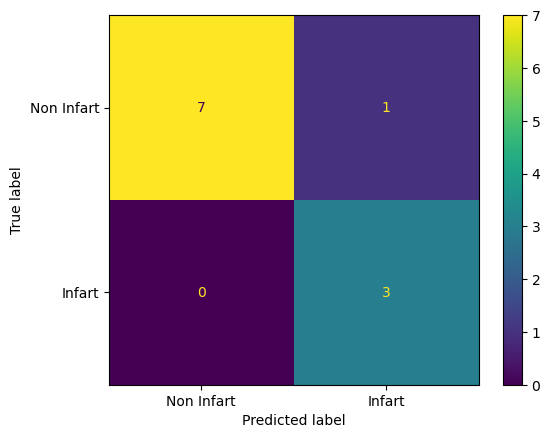

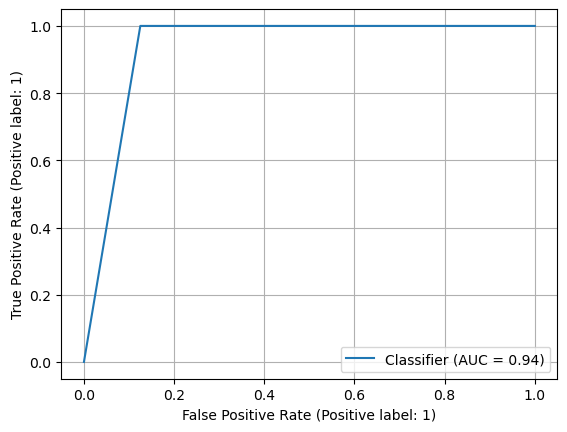

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




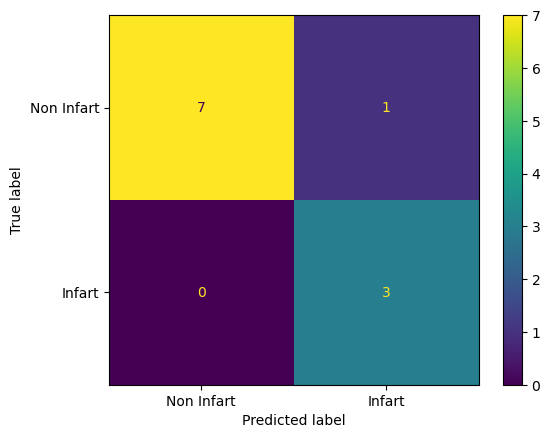

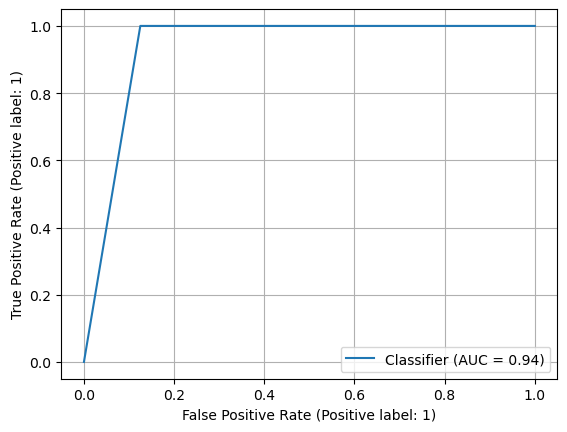

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




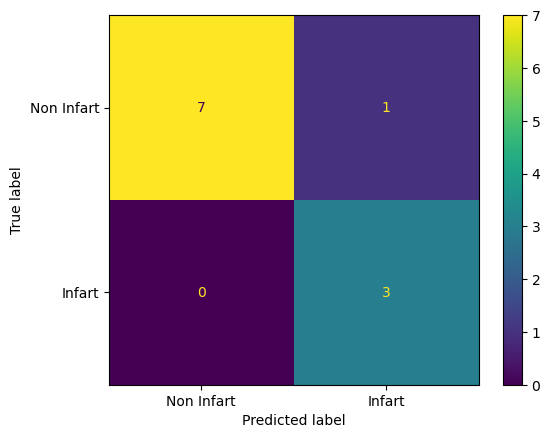

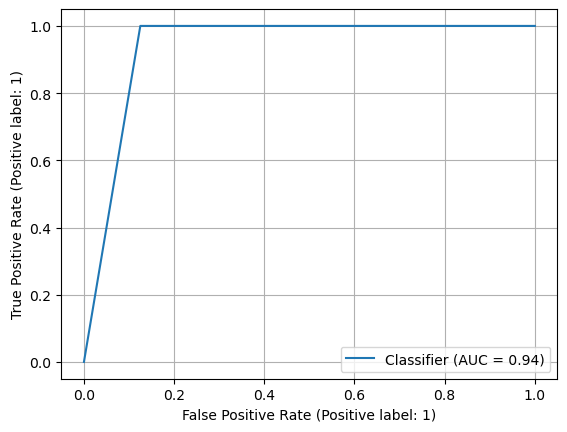

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




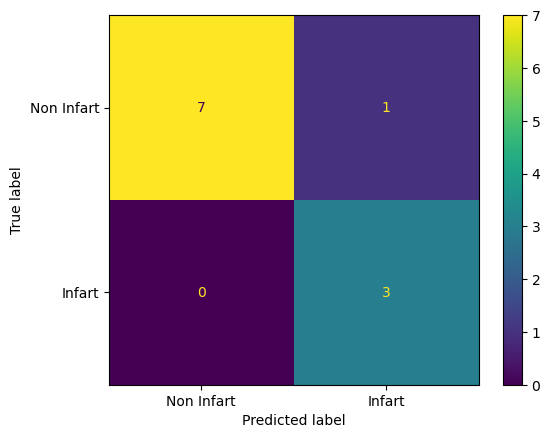

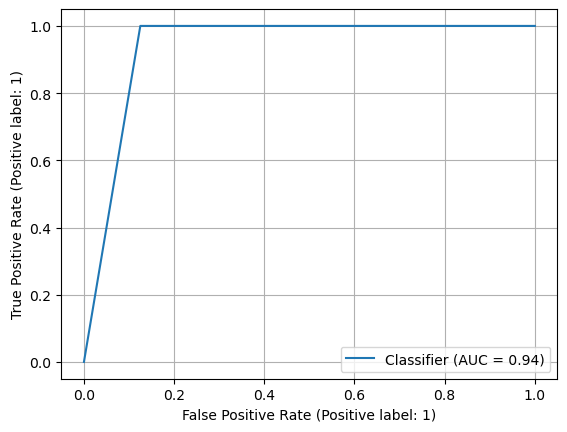

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




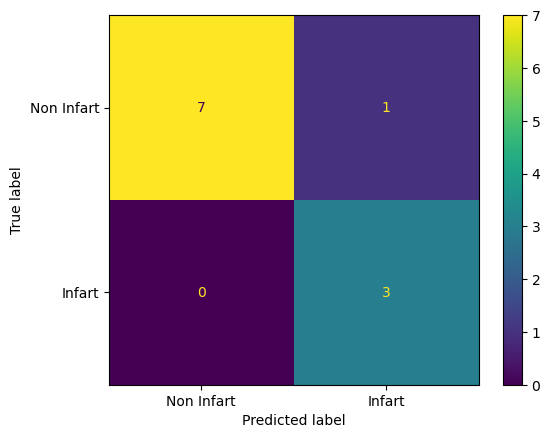

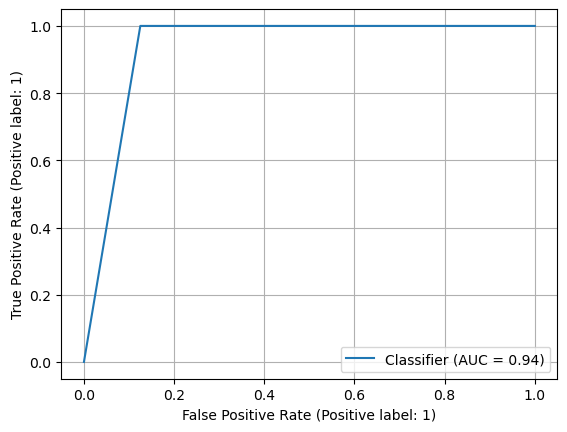

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




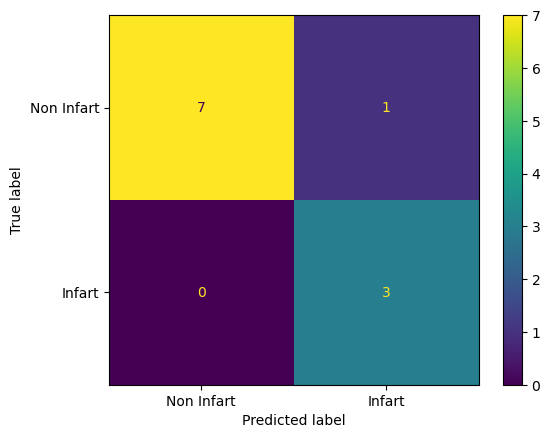

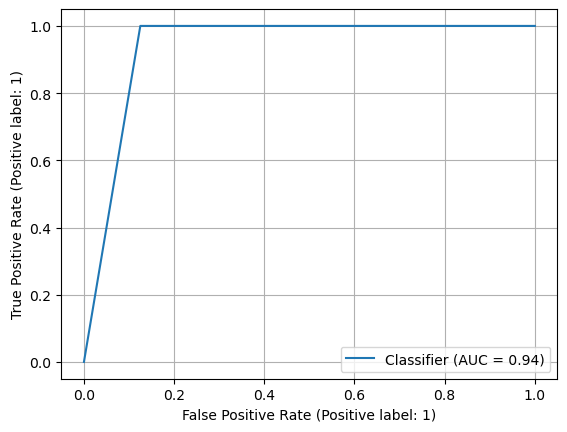

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




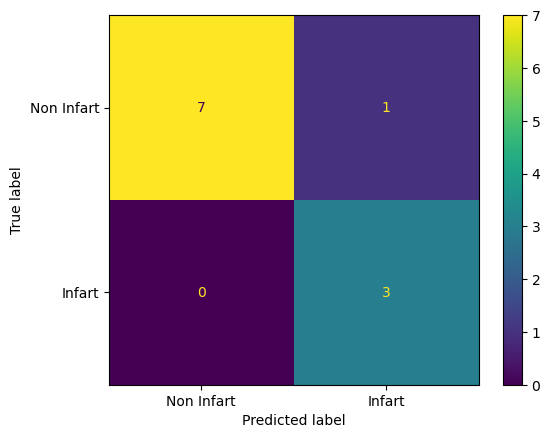

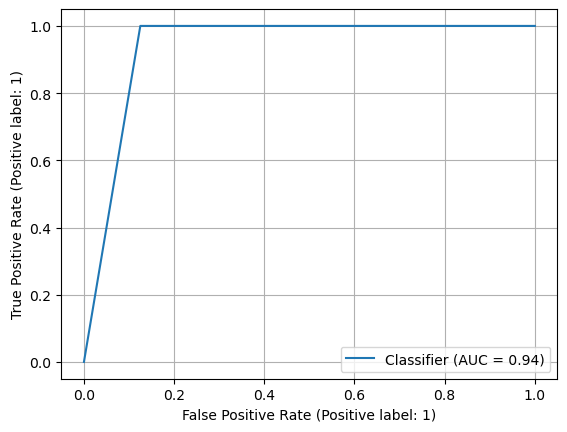

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




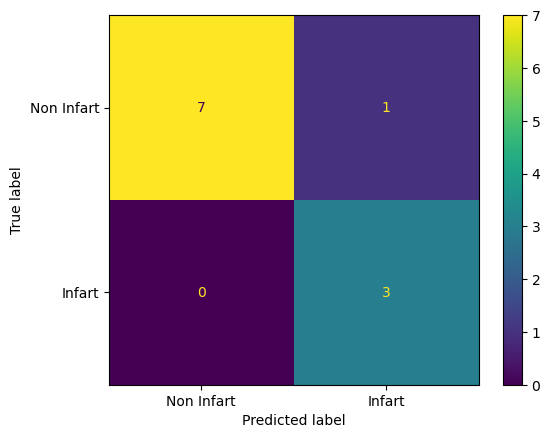

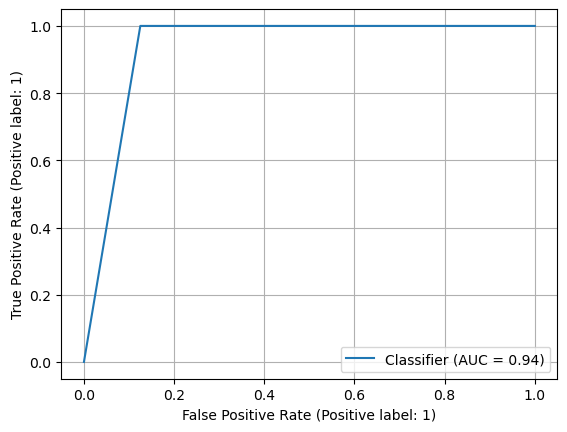

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




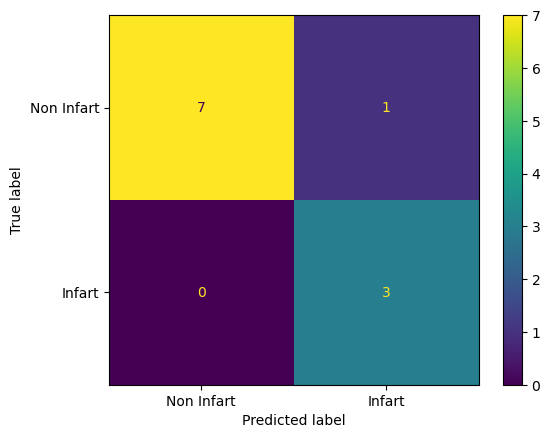

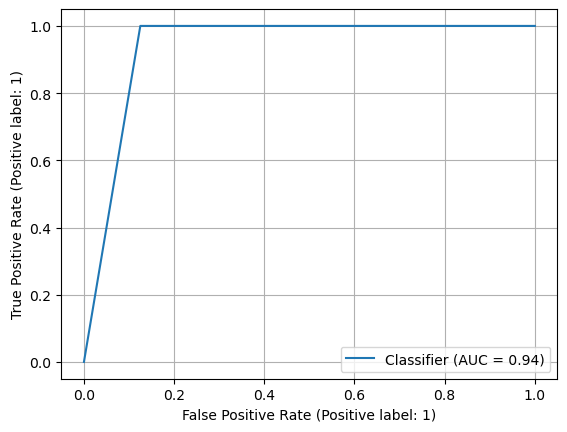

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




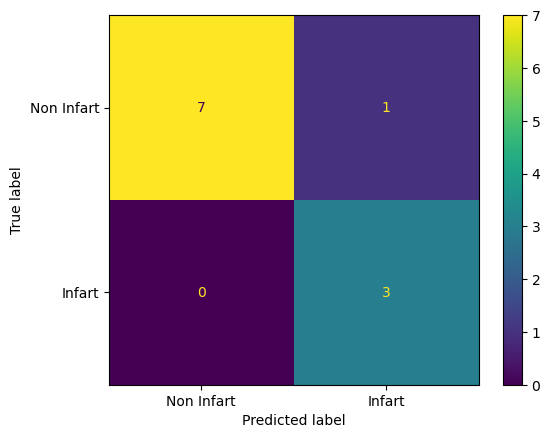

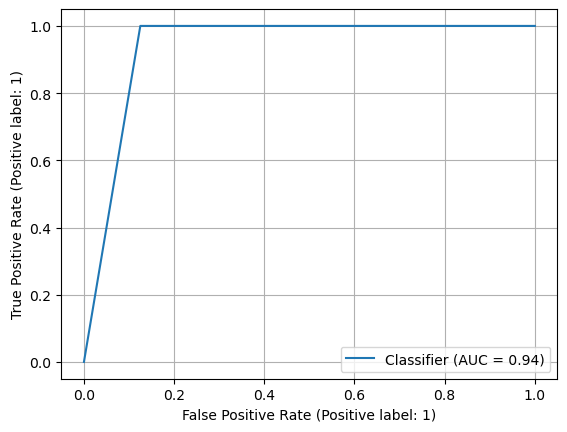

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




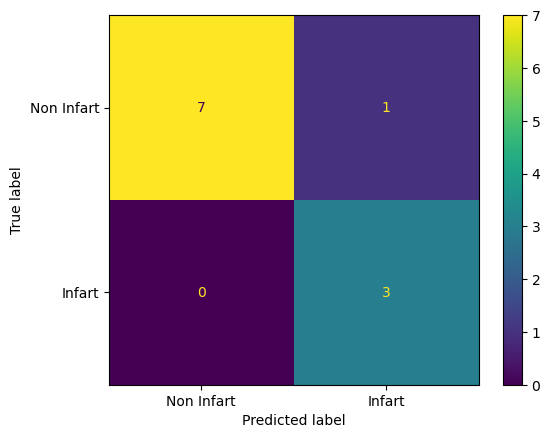

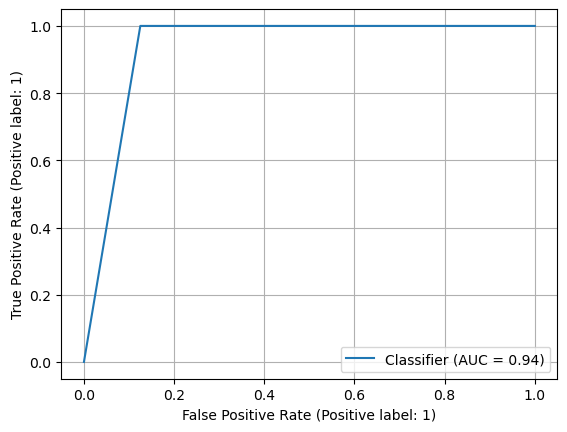

Number of samples: 11
Specificity= 0.875
Sensibility= 1.0
False positive rate = 0.125




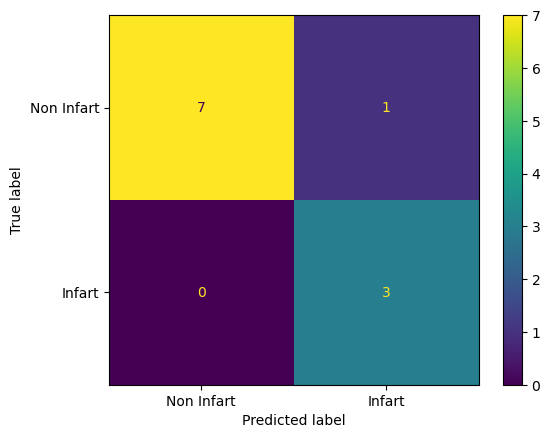

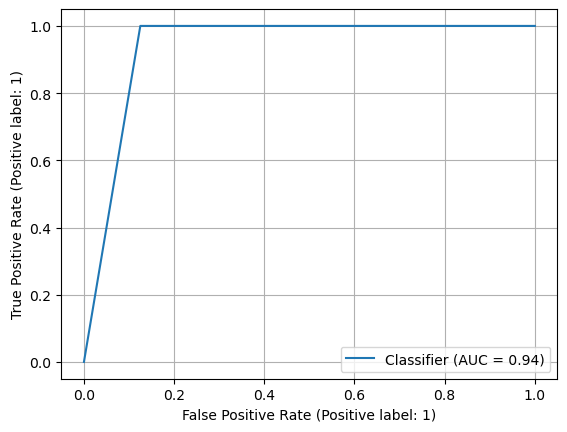

Mean Specificity= 0.8607954545454546 Std: 0.06086444683417201
Mean Sensibility= 1.0  Std: 0.0
Mean False Positive Rate= 0.13920454545454544  Std: 0.06086444683417202


In [15]:
model = DecisionTreeClassifier()
grid = GridSearchCV(model, param_grid_deci_tree, cv=cv)
grid_results = grid.fit(X_train, y_train)
print(grid_results.best_params_)

estimators = cross_validate(grid_result.best_estimator_, X_train, y_train, scoring='accuracy', cv = cv, n_jobs=-1, return_estimator=True)
evaluate_kfold(estimators['estimator'], X_total=X_test, y_total=y_test)